# Loading libraries and datset

In [2]:
library('ggplot2')      # for visualisation
library('dplyr')        # for manipulation
library('caret')        # mainly for gbm and parameter tunning
library('corrplot')     # for pearson correlation matrix
library('pROC')         # for plotting AUC and ROC curve
library('xgboost')      # for xgboost

options( repr.plot.width = 15,      repr.plot.height = 10,        scipen = 100,        repr.matrix.max.cols=100)
#           plot width                 plot height            show general numericals         show 100 column

In [3]:
data = read.csv('C:/Users/Vikes/Downloads/Jupyter Notebook/train.csv') # reading the data

# Overview of dataset

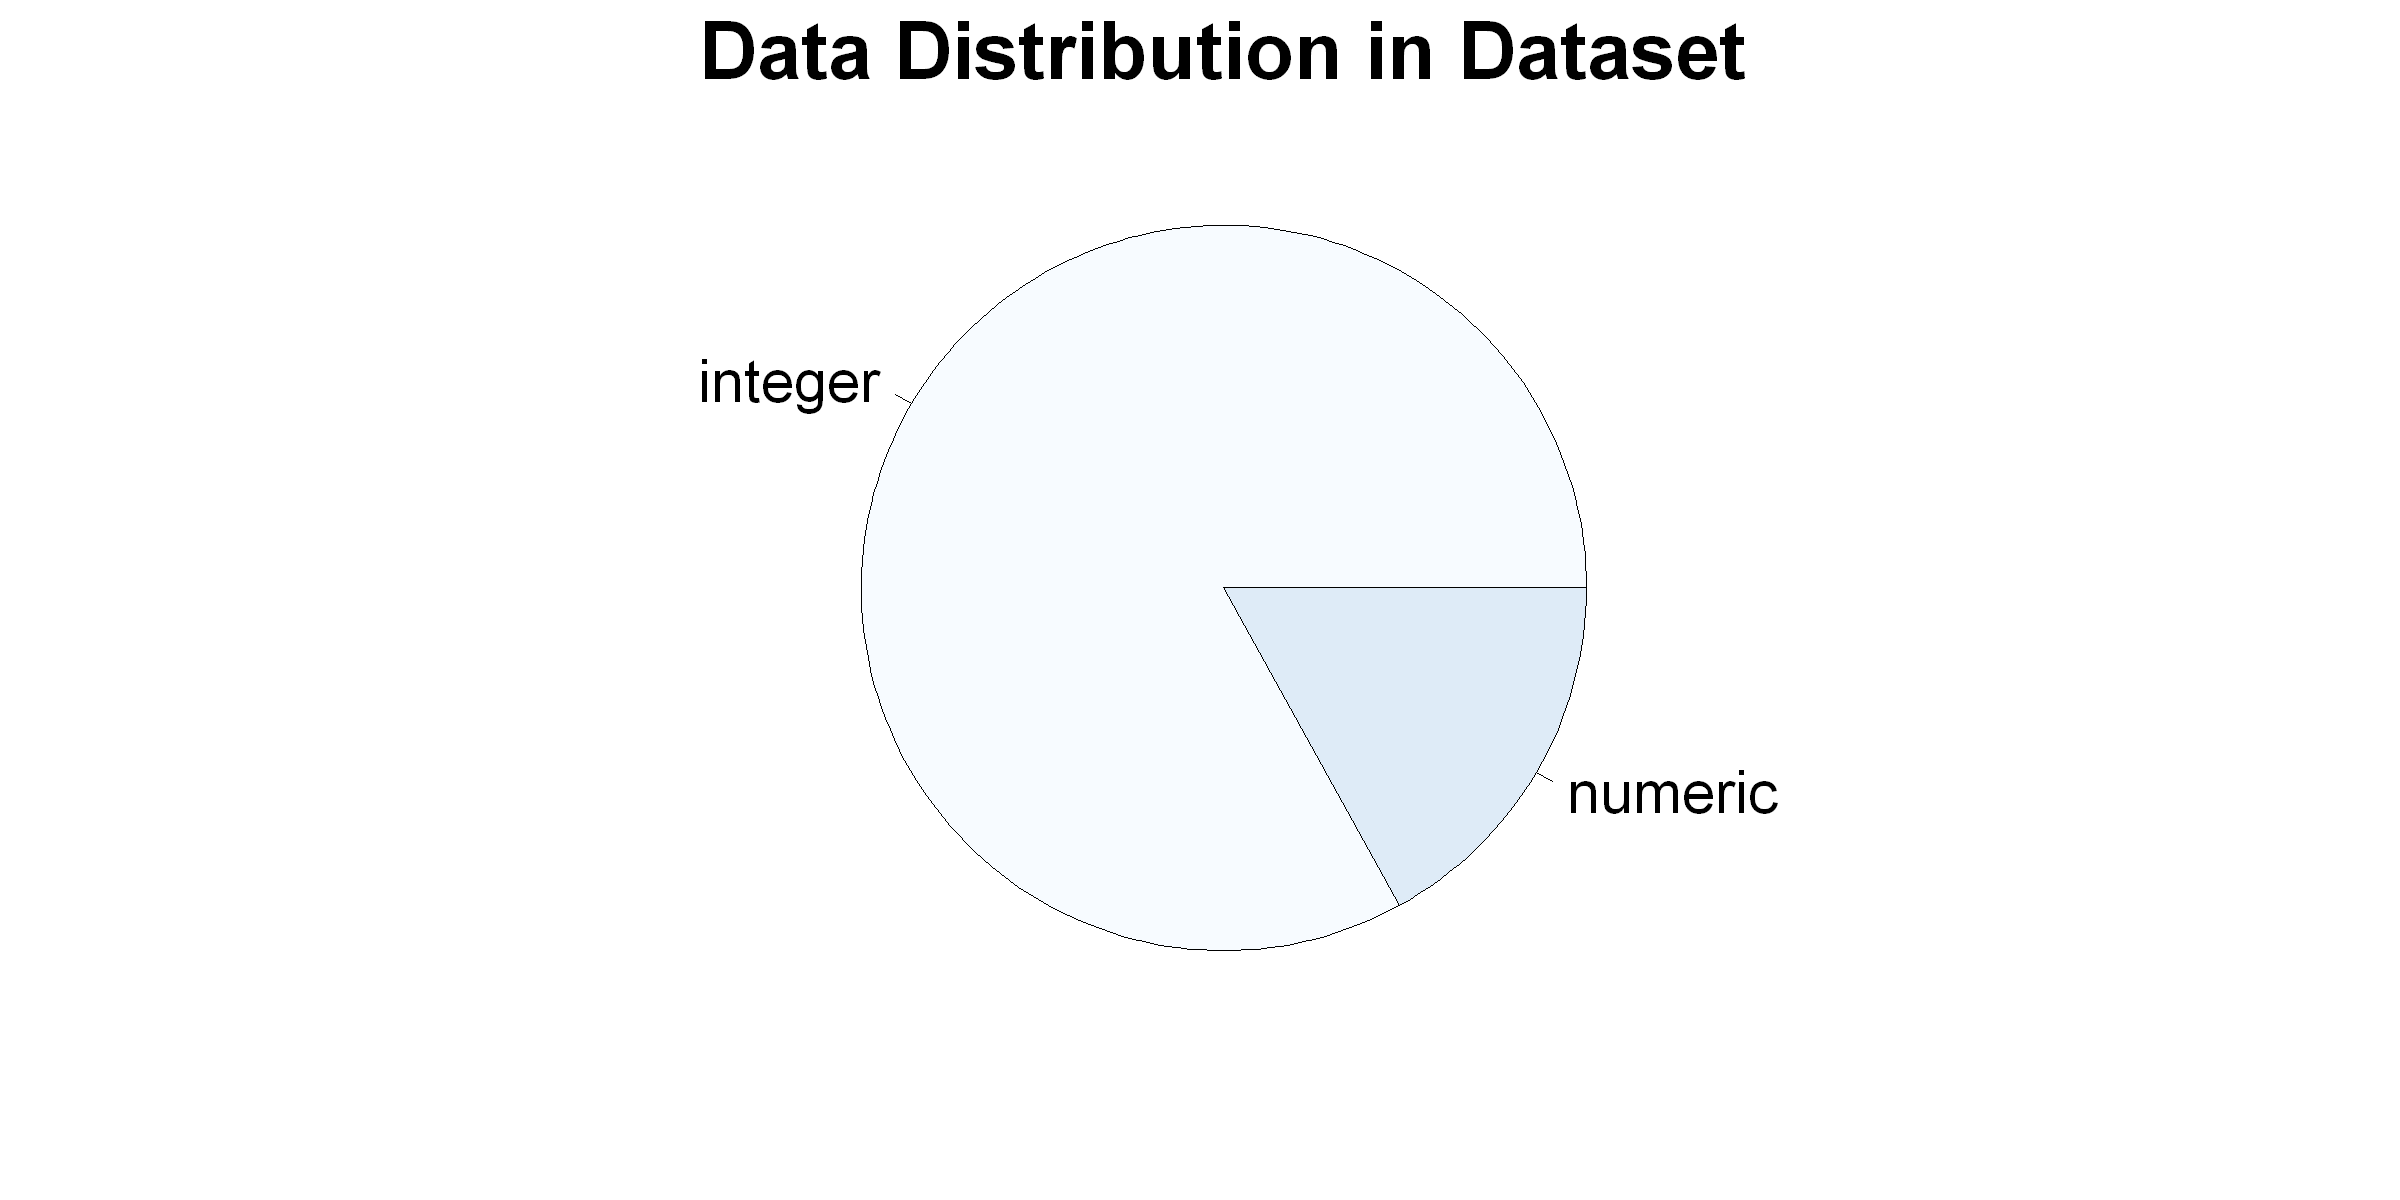

In [4]:
pie(table(sapply(data, class)), main = 'Data Distribution in Dataset', cex = 3, cex.main = 4, col =blues9)

In [5]:
dim(data)   # no of features and observation
head(data)  # first 6 obsevation

[1] 595212     59

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.7180703,10,1,-1,0,1,4,1,0,0,1,12,2,0.4000000,0.8836789,0.3708099,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
2,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.7660777,11,1,-1,0,-1,11,1,1,2,1,19,3,0.3162278,0.6188165,0.3887158,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
3,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.0000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.3162278,0.6415857,0.3472751,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
4,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.5809475,7,1,0,0,1,11,1,1,3,1,104,1,0.3741657,0.5429488,0.2949576,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
5,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.8407586,11,1,-1,0,-1,14,1,1,2,1,82,3,0.3160696,0.5658315,0.3651027,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
6,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.3326487,10,0,-1,0,0,14,1,1,0,1,104,2,0.4459821,0.8790491,0.4062019,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1


In [6]:
names(data) # feature names

[1] "id"             "target"         "ps_ind_01"      "ps_ind_02_cat" 
 [5] "ps_ind_03"      "ps_ind_04_cat"  "ps_ind_05_cat"  "ps_ind_06_bin" 
 [9] "ps_ind_07_bin"  "ps_ind_08_bin"  "ps_ind_09_bin"  "ps_ind_10_bin" 
[13] "ps_ind_11_bin"  "ps_ind_12_bin"  "ps_ind_13_bin"  "ps_ind_14"     
[17] "ps_ind_15"      "ps_ind_16_bin"  "ps_ind_17_bin"  "ps_ind_18_bin" 
[21] "ps_reg_01"      "ps_reg_02"      "ps_reg_03"      "ps_car_01_cat" 
[25] "ps_car_02_cat"  "ps_car_03_cat"  "ps_car_04_cat"  "ps_car_05_cat" 
[29] "ps_car_06_cat"  "ps_car_07_cat"  "ps_car_08_cat"  "ps_car_09_cat" 
[33] "ps_car_10_cat"  "ps_car_11_cat"  "ps_car_11"      "ps_car_12"     
[37] "ps_car_13"      "ps_car_14"      "ps_car_15"      "ps_calc_01"    
[41] "ps_calc_02"     "ps_calc_03"     "ps_calc_04"     "ps_calc_05"    
[45] "ps_calc_06"     "ps_calc_07"     "ps_calc_08"     "ps_calc_09"    
[49] "ps_calc_10"     "ps_calc_11"     "ps_calc_12"     "ps_calc_13"    
[53] "ps_calc_14"     "ps_calc_15_bin" "ps_calc_16_bin" "ps_calc_17_bin"
[57] "ps_calc_18_bin" "ps_calc_19_bin" "ps_calc_20_bin"

In [7]:
data$id = NULL # feature id isn't going to help in prediction, hence removing

In [8]:
summary(data)

     target          ps_ind_01   ps_ind_02_cat      ps_ind_03     
 Min.   :0.00000   Min.   :0.0   Min.   :-1.000   Min.   : 0.000  
 1st Qu.:0.00000   1st Qu.:0.0   1st Qu.: 1.000   1st Qu.: 2.000  
 Median :0.00000   Median :1.0   Median : 1.000   Median : 4.000  
 Mean   :0.03645   Mean   :1.9   Mean   : 1.359   Mean   : 4.423  
 3rd Qu.:0.00000   3rd Qu.:3.0   3rd Qu.: 2.000   3rd Qu.: 6.000  
 Max.   :1.00000   Max.   :7.0   Max.   : 4.000   Max.   :11.000  
 ps_ind_04_cat     ps_ind_05_cat     ps_ind_06_bin    ps_ind_07_bin  
 Min.   :-1.0000   Min.   :-1.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median : 0.0000   Median : 0.0000   Median :0.0000   Median :0.000  
 Mean   : 0.4168   Mean   : 0.4052   Mean   :0.3937   Mean   :0.257  
 3rd Qu.: 1.0000   3rd Qu.: 0.0000   3rd Qu.:1.0000   3rd Qu.:1.000  
 Max.   : 1.0000   Max.   : 6.0000   Max.   :1.0000   Max.   :1.000  
 ps_ind_08_bin    ps_ind_09_bin    ps_ind

# Data Cleaning

In [9]:
data[data == -1] = NA # convering -1 as 'NA'

In [10]:
data.frame(sapply(data, function(x) sum(is.na(x)))) # counting missing values in each column

,sapply.data..function.x..sum.is.na.x...
,<int>
target,0
ps_ind_01,0
ps_ind_02_cat,216
ps_ind_03,0
ps_ind_04_cat,83
ps_ind_05_cat,5809
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


In [11]:
# We don't know which level represents what in each feature. So, filling 0 for missing values in categorial features
# and round of mean values for relevant features.

data$ps_ind_02_cat = ifelse(is.na(data$ps_ind_02_cat) == T, round(mean(data$ps_ind_02_cat, na.rm = T)), data$ps_ind_02_cat)
data$ps_ind_04_cat = ifelse(is.na(data$ps_ind_04_cat) == T, 0, data$ps_ind_04_cat)
data$ps_ind_05_cat = ifelse(is.na(data$ps_ind_05_cat) == T, round(mean(data$ps_ind_05_cat, na.rm=T)), data$ps_ind_05_cat)

data$ps_car_01_cat = ifelse(is.na(data$ps_car_01_cat) == T, round(mean(data$ps_car_01_cat, na.rm=T)), data$ps_car_01_cat)
data$ps_car_02_cat = ifelse(is.na(data$ps_car_02_cat) == T, 0, data$ps_car_02_cat)
data$ps_car_03_cat = ifelse(is.na(data$ps_car_03_cat) == T, 0, data$ps_car_03_cat)
data$ps_car_05_cat = ifelse(is.na(data$ps_car_05_cat) == T, 0, data$ps_car_05_cat)
data$ps_car_07_cat = ifelse(is.na(data$ps_car_07_cat) == T, 0, data$ps_car_07_cat)
data$ps_car_09_cat = ifelse(is.na(data$ps_car_09_cat) == T, round(mean(data$ps_car_09_cat, na.rm=T)), data$ps_car_09_cat)

data$ps_car_11 = ifelse(is.na(data$ps_car_11) == T, round(mean(data$ps_car_11, na.rm=T)), data$ps_car_11)
data$ps_car_12 = ifelse(is.na(data$ps_car_12) == T, mean(data$ps_car_12, na.rm=T), data$ps_car_12)
data$ps_car_14 = ifelse(is.na(data$ps_car_14) == T, mean(data$ps_car_14, na.rm=T), data$ps_car_14)

data$ps_reg_03 = ifelse(is.na(data$ps_reg_03) == T, mean(data$ps_reg_03, na.rm=T), data$ps_reg_03)

# Data Split

In [12]:
set.seed(10) # generate same sequence of random numbers each time

samp = sample(seq_len(nrow(data)), size = floor(nrow(data)*0.8)) # splitting randomly 80% of data as train and 20% as test
train = data[samp,]
test = data[-samp,]

In [13]:
nrow(data) # number of row in main, train and test dataset
nrow(train)
nrow(test)

[1] 595212

[1] 476169

[1] 119043

# Pearson Corelation

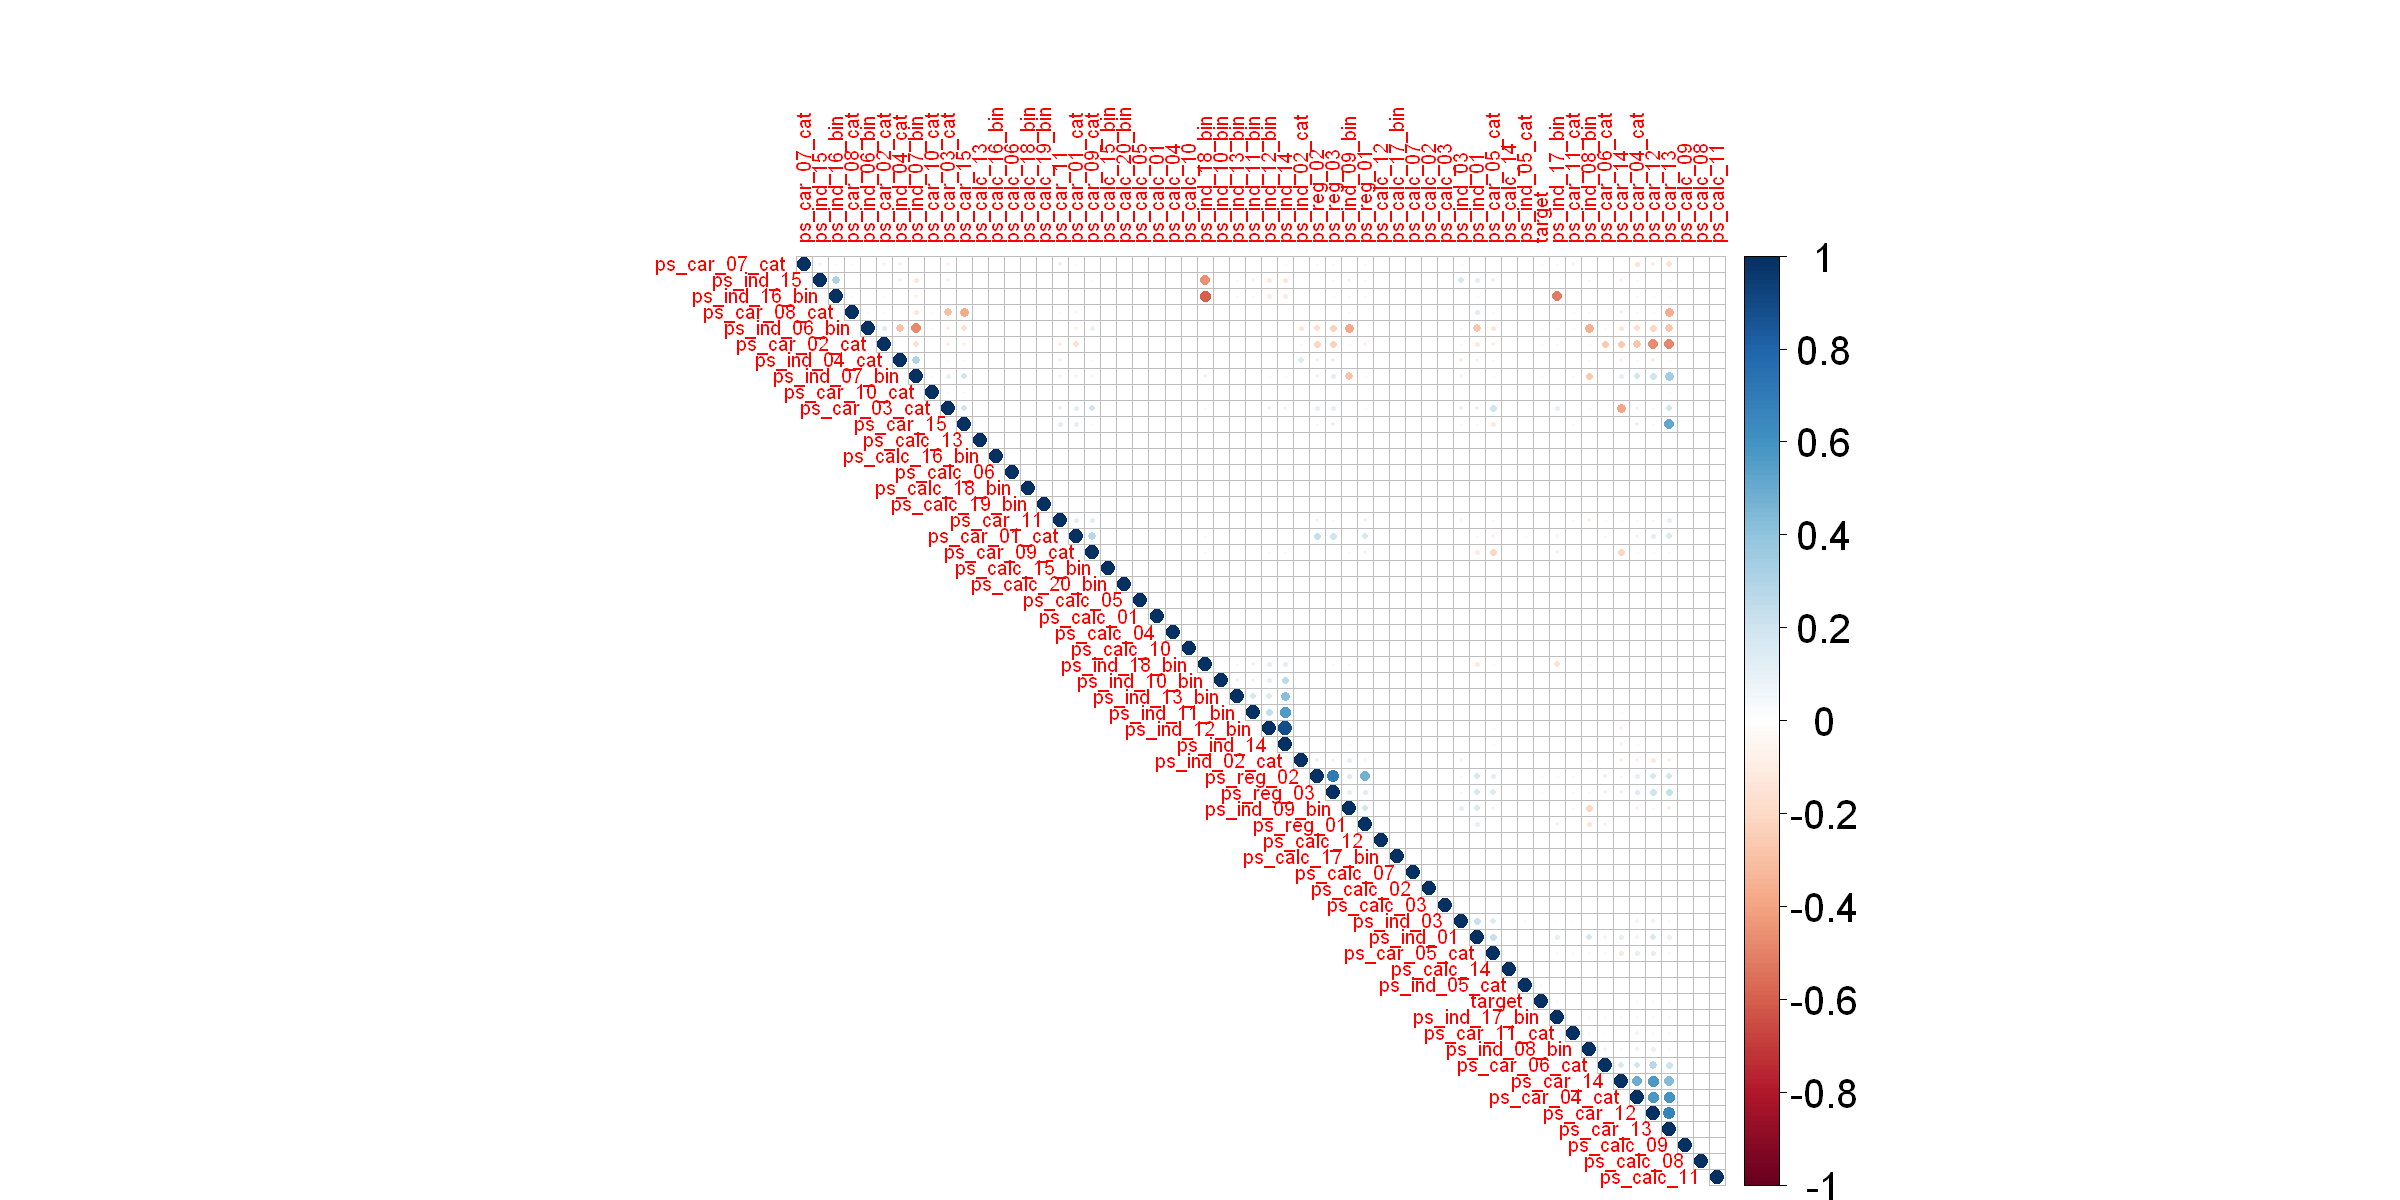

In [14]:
c <- cor(train[,sapply(train, function(x) is.numeric(x))]) # find pearson correlation matrix between all the numerical columns.
corrplot(c, method = 'circle',type="upper", order="hclust",tl.cex = 1, cl.cex = 2) # plotting the pearson correlation matrix.

# Exploratory Data Analysis

In [15]:
train %>% group_by(target) %>% count

# 96.36% drivers will not claim for insurance next year

target,n
<int>,<int>
0,458818
1,17351


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



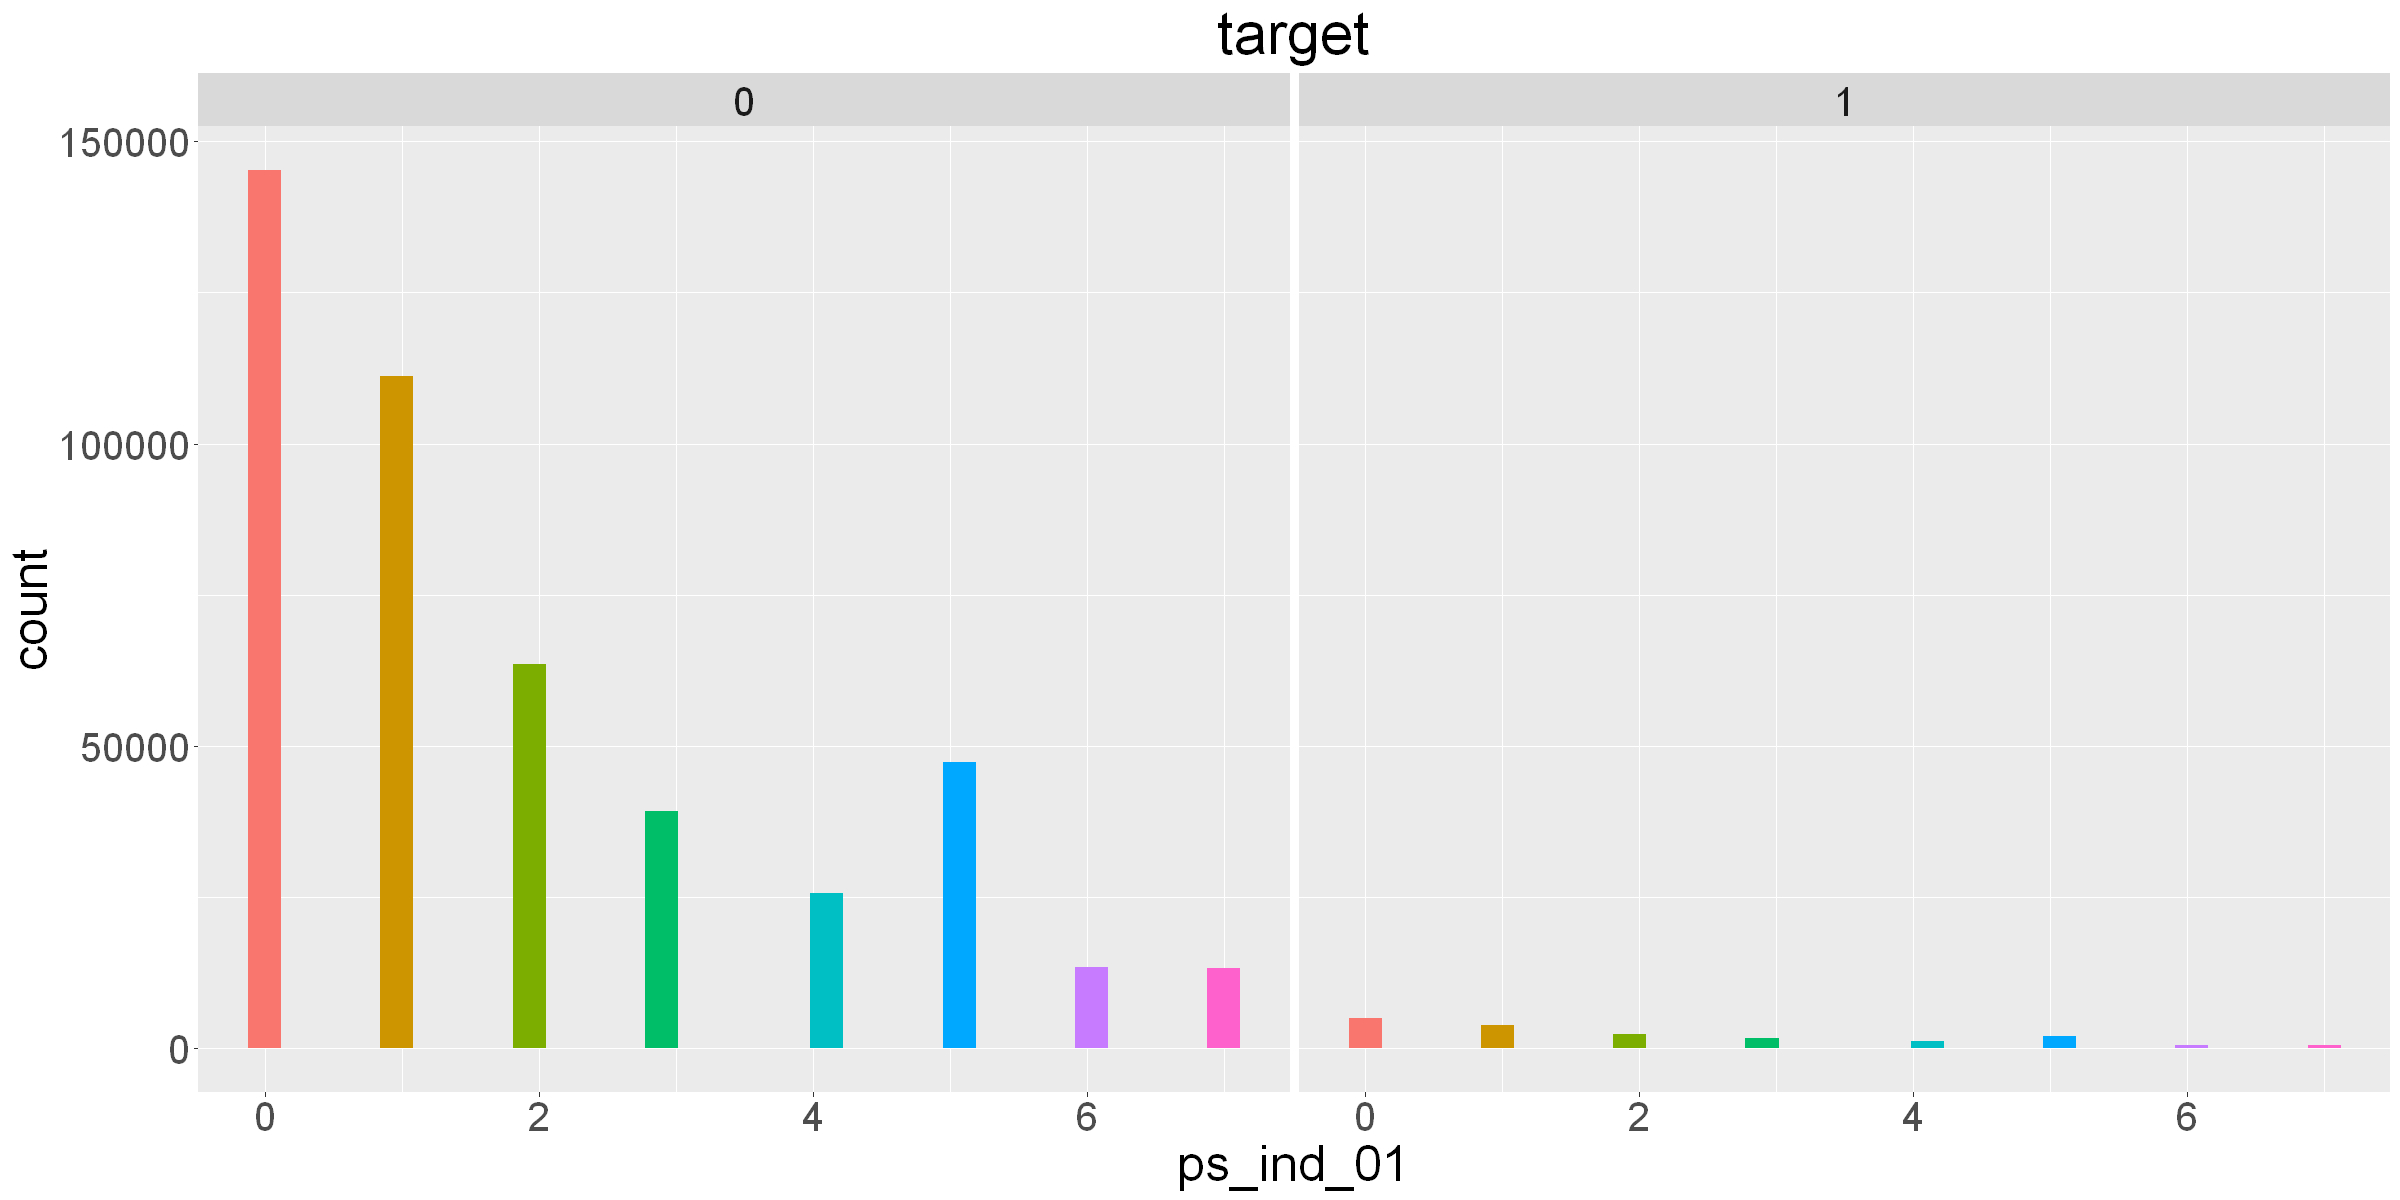

In [16]:
ggplot(train) + geom_histogram(aes(ps_ind_01, fill = factor(ps_ind_01))) + facet_wrap(~target) + ggtitle('target') + 
theme(text = element_text(size = 30), legend.position = 'None', plot.title = element_text(hjust = .5))

# Most insurance is claimed by customers having 0 and 1 as ps_ind_01 and least insurancce is claimed by 7 as ps_ind_01.
# Also isuramce claim's decreases as ps_ind_01 value increases except for 5 as ps_ind_01 value.

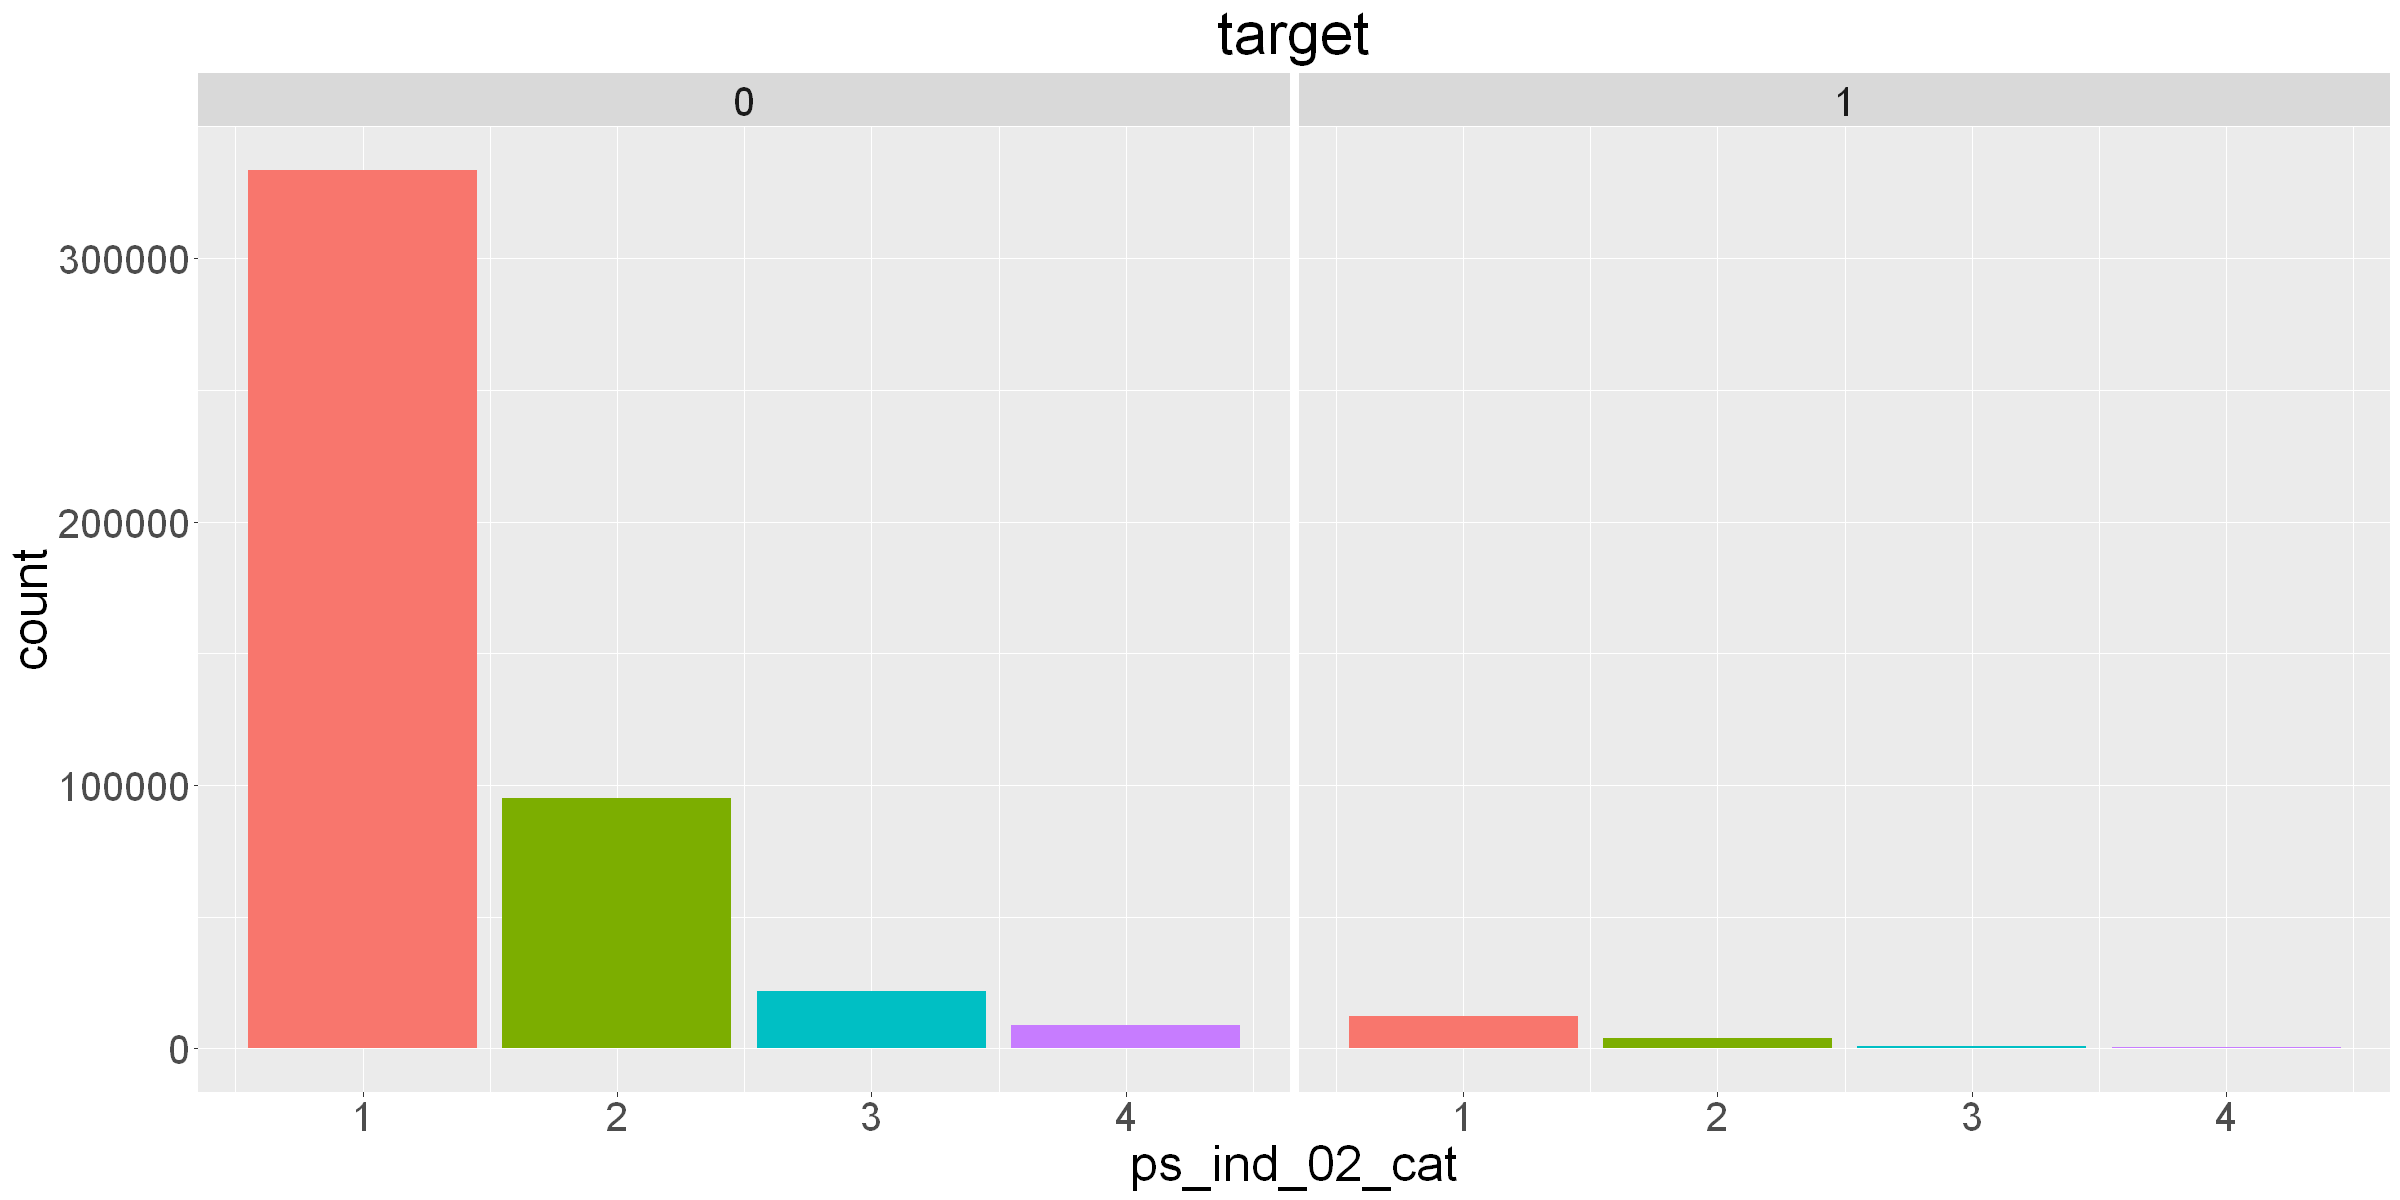

In [17]:
ggplot(train) + geom_bar(aes(ps_ind_02_cat, fill = factor(ps_ind_02_cat))) + facet_wrap(~target) + ggtitle('target') + 
theme(text = element_text(size = 30), legend.position = 'None', plot.title = element_text(hjust = .5))

# Most insurance is claimed by customers having 1 as ps_ind_02_cat and least by 4 as ps_ind_02_cat
# Also isuramce claim's decreases as ps_ind_02_cat value increases.
# Most of the customers are having 0 as ps_ind_02_cat value.

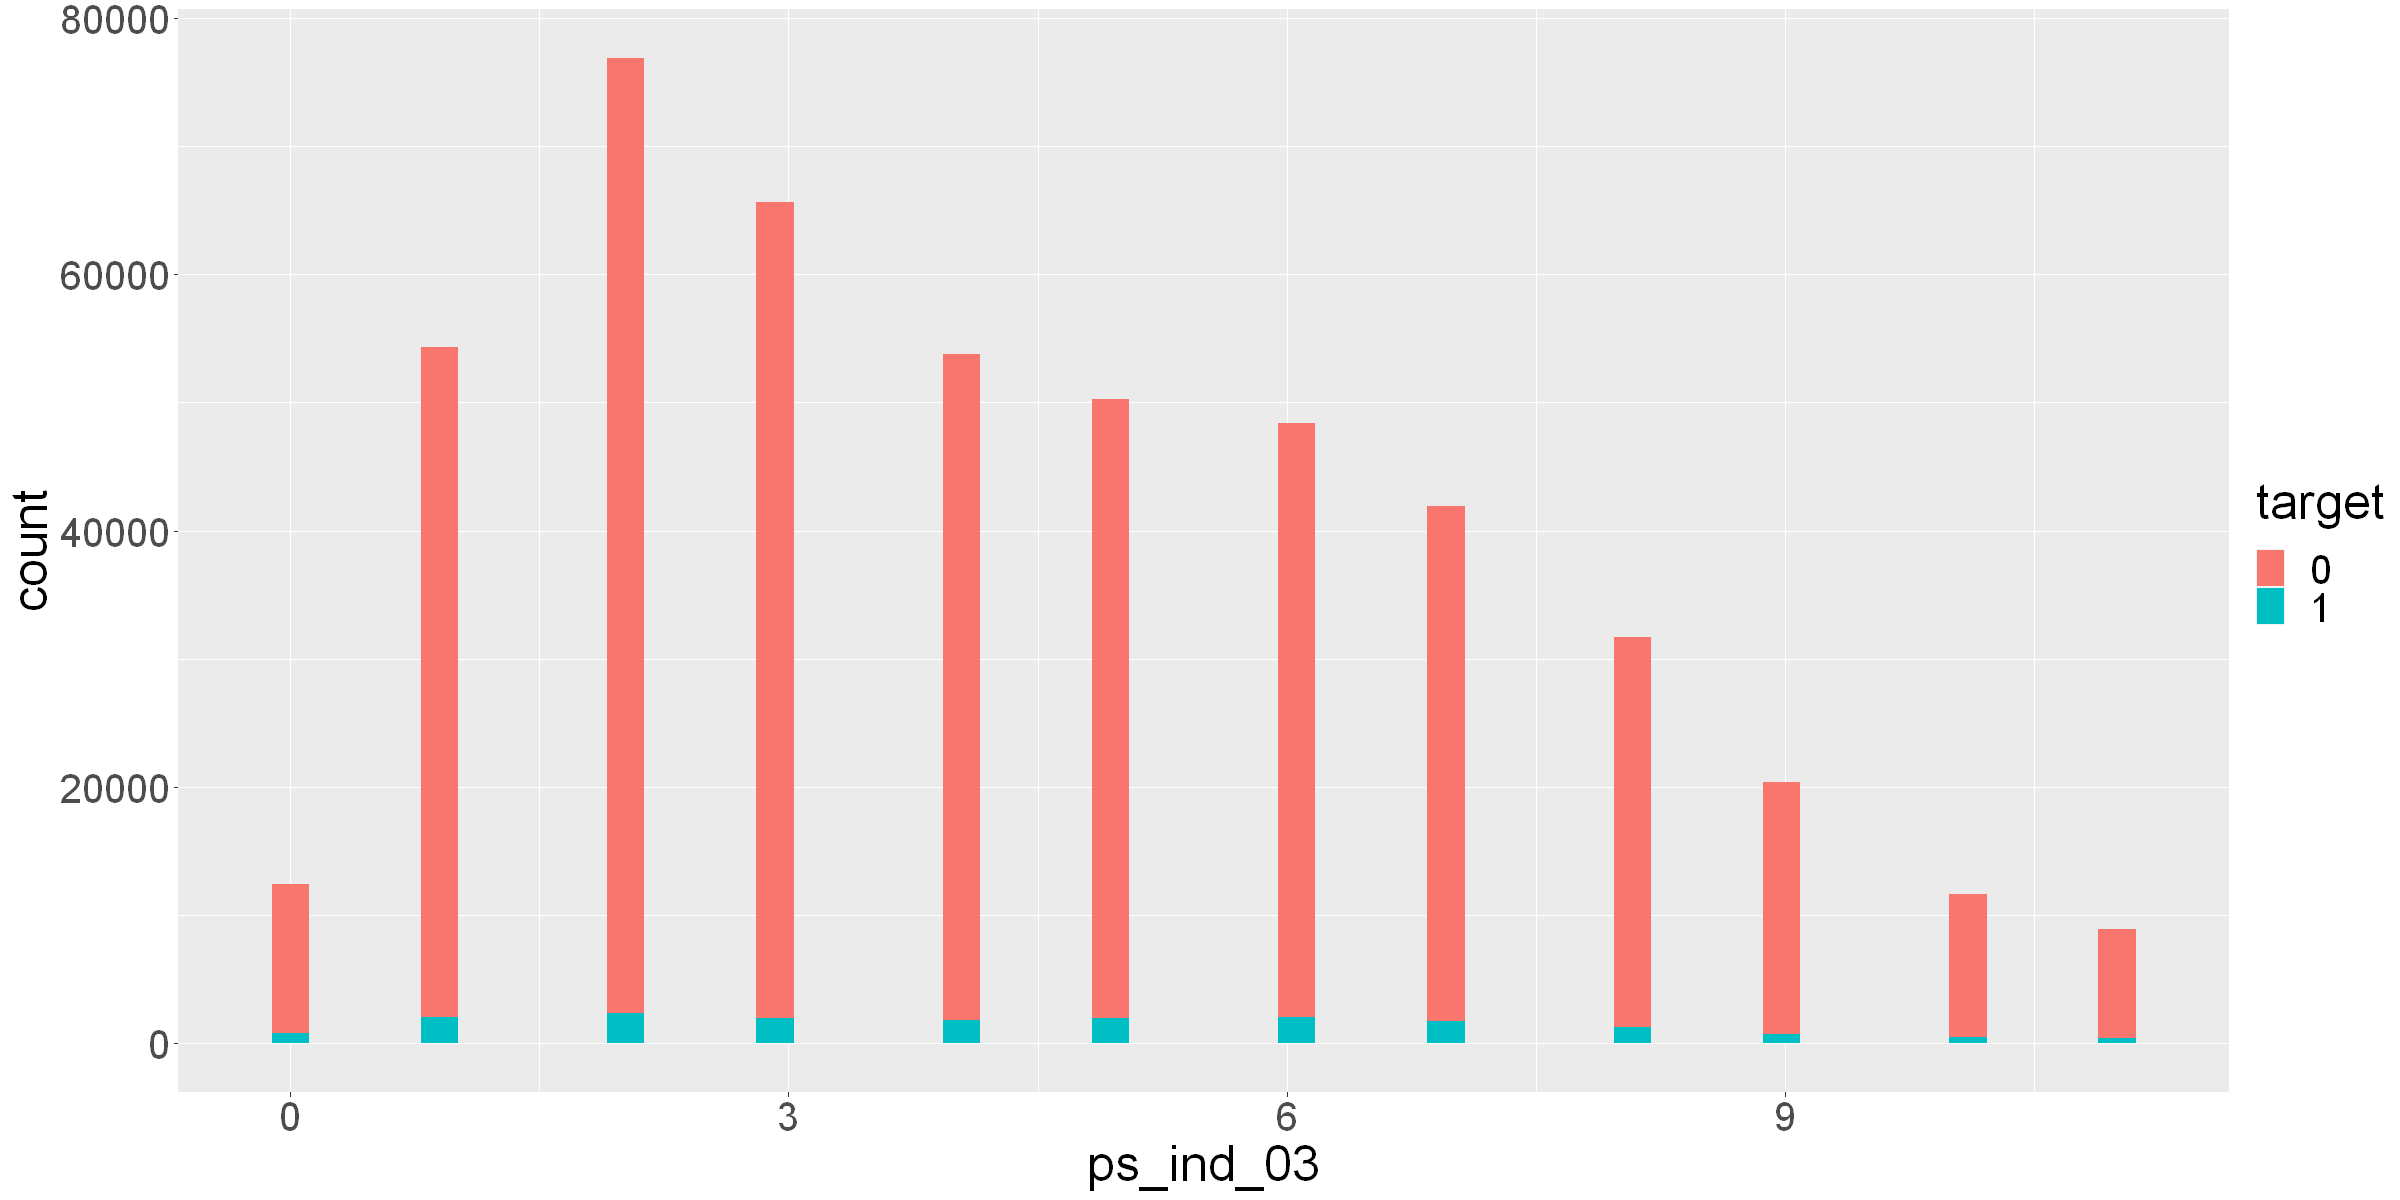

In [18]:
ggplot(train) + geom_histogram(aes(ps_ind_03, fill = factor(target)), bins = 50) + scale_fill_discrete(name = "target") +
theme(text =element_text(size = 30))

# Insurance claims increases for 0-3 ps_ind_03 valued customers. It reamins constant for 3-7 ps_ind_03 valued customers.
# Insurance claims starts decresing after 7 ps_ind_03 valued customers.
# Customers not claiming insurance increses till 3 ps_ind_03 value but it starts decresing after 3 as ps_ind_03 value increses.

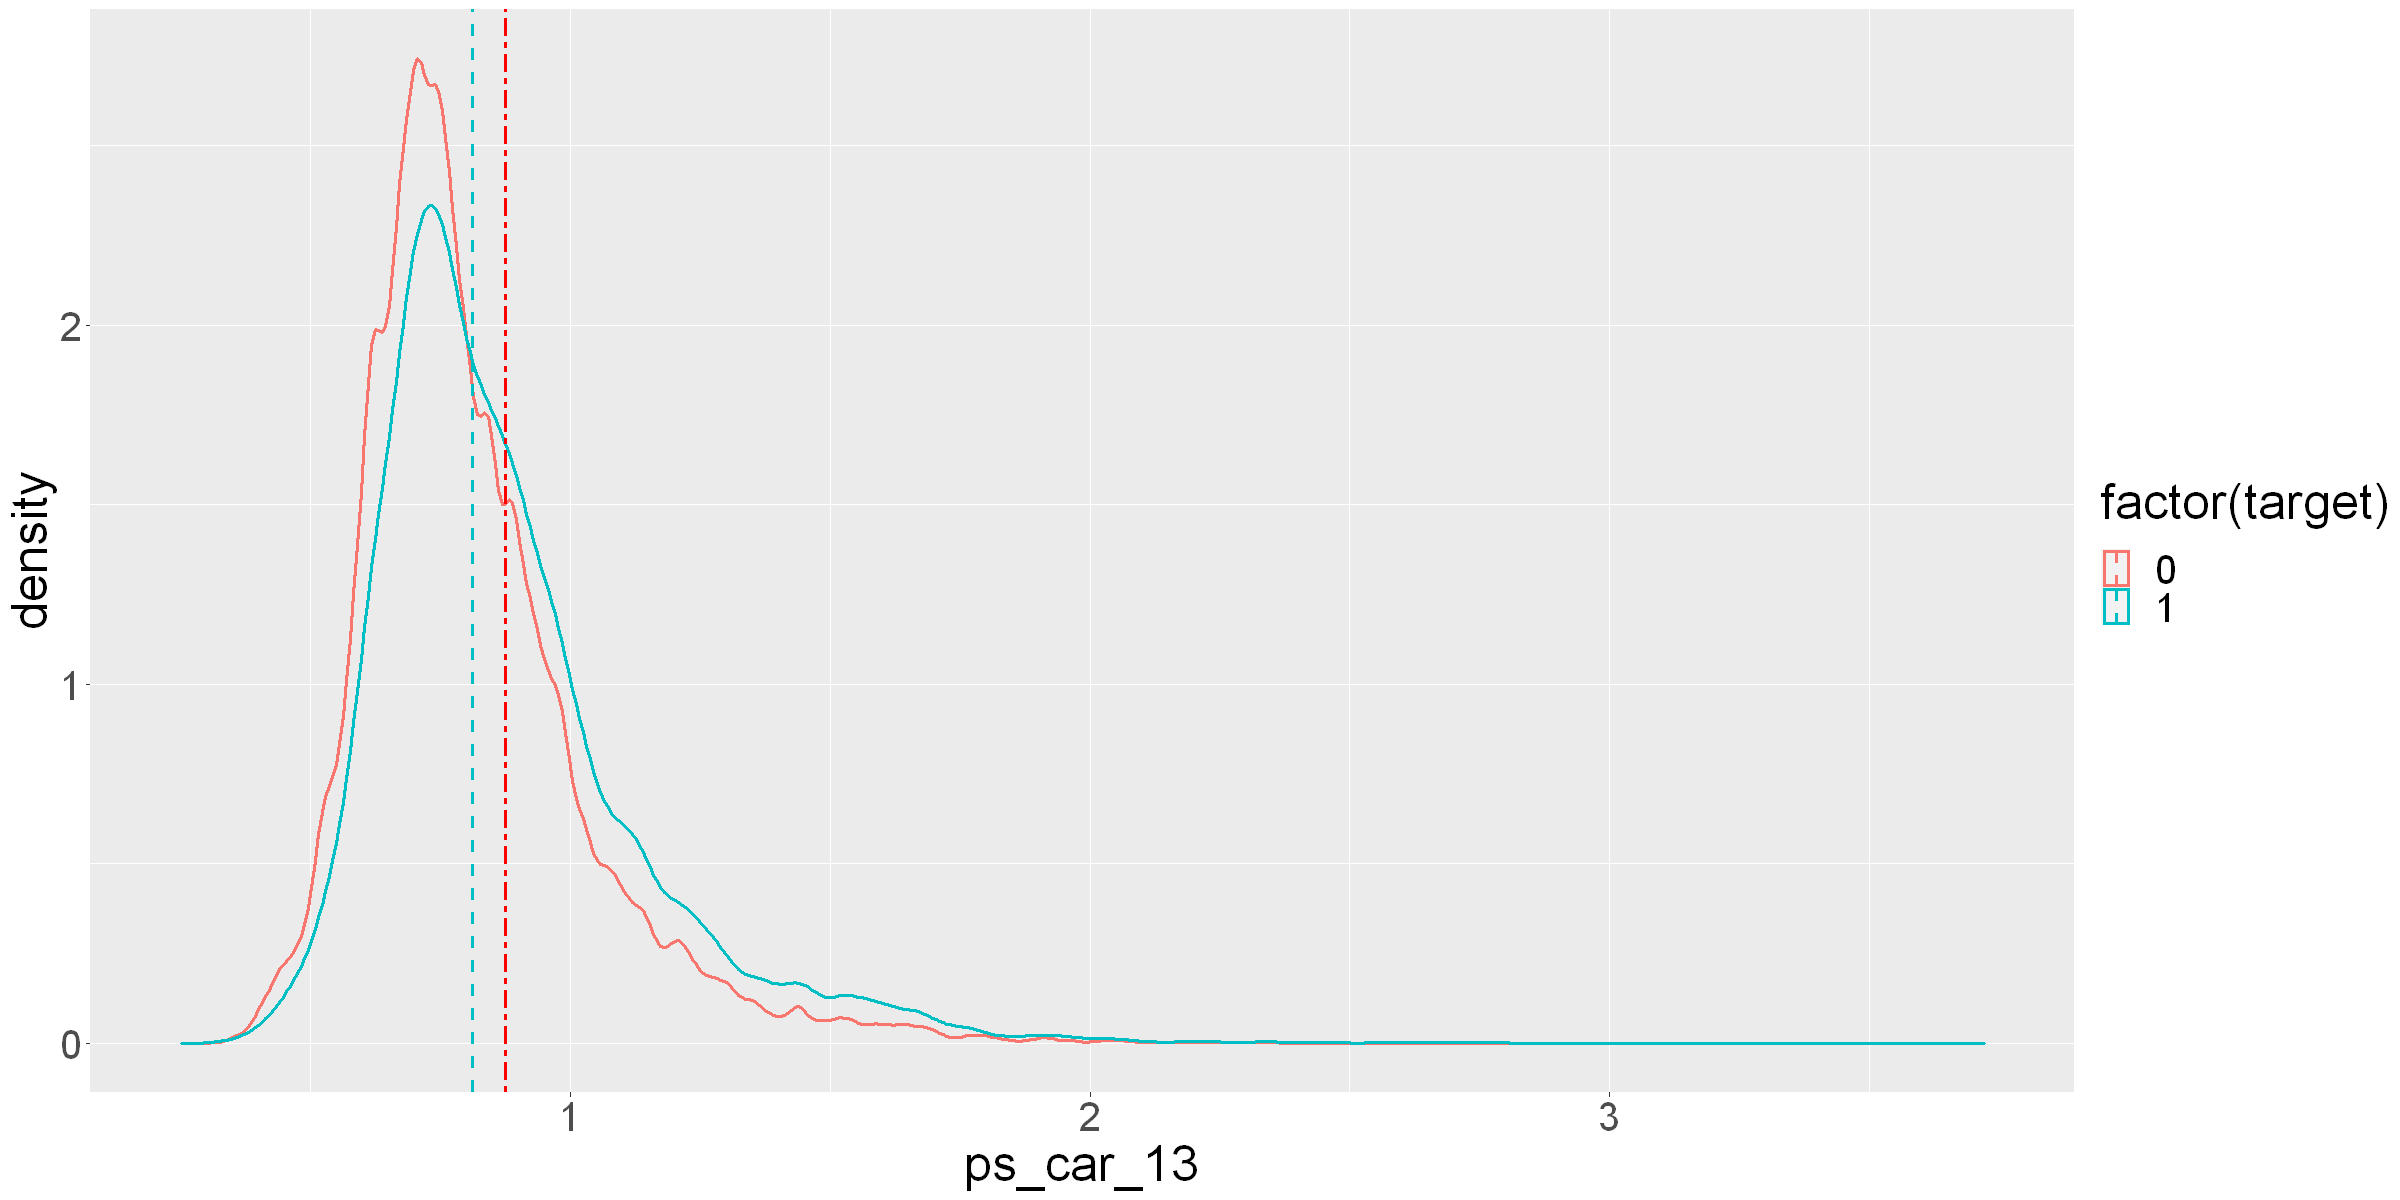

In [19]:
ggplot(train) + geom_density(aes(ps_car_13, col = factor(target)), size = 1) + theme(text = element_text(size =30))+
geom_vline(aes(xintercept = mean(ps_car_13[target == 0]), col = factor(target)), size = 1, linetype = 'dashed') + 
geom_vline(aes(xintercept = mean(ps_car_13[target == 1])), col = 'red', size = 1, linetype = 'twodash')

# ps_car_13 value is densly spread between approx 0.6 and 1.

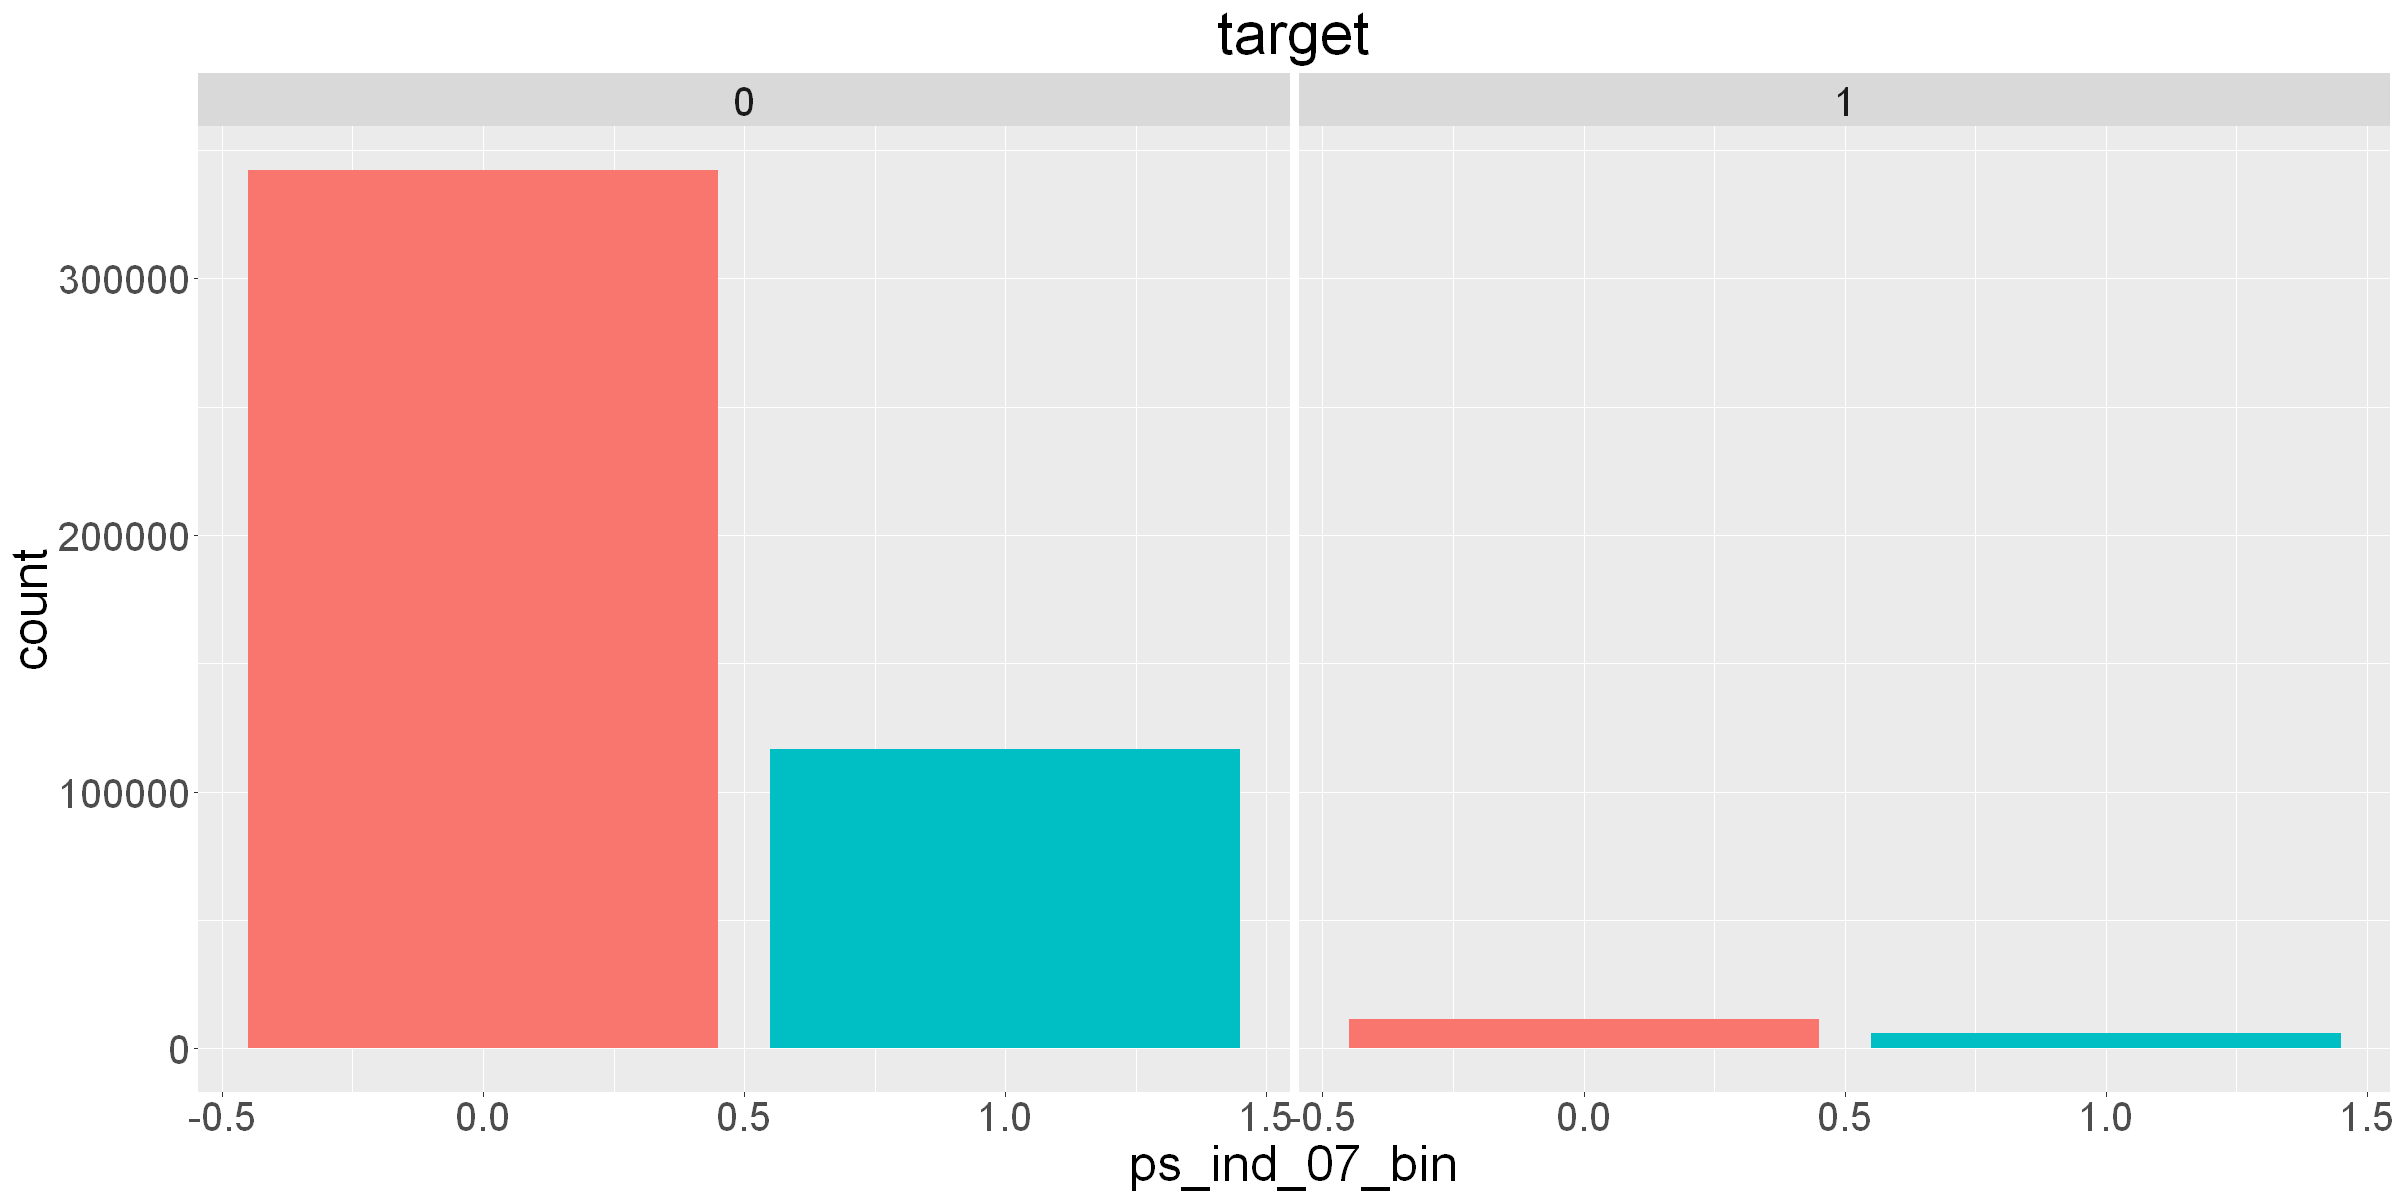

In [20]:
ggplot(train) + geom_bar(aes(ps_ind_07_bin, fill = factor(ps_ind_07_bin))) + facet_wrap(~target) + ggtitle('target') + 
theme(text = element_text(size = 30), legend.position = 'None', plot.title = element_text(hjust = .5))

# Prediction using logistic Regression

In [21]:
mod_glm = glm(target~., family = binomial(link = 'logit'), train) # model creation
summary(mod_glm)


Call:
glm(formula = target ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9369  -0.2919  -0.2533  -0.2227   3.0109  

Coefficients: (2 not defined because of singularities)
                  Estimate  Std. Error z value             Pr(>|z|)    
(Intercept)    -4.47071062  0.18488751 -24.181 < 0.0000000000000002 ***
ps_ind_01       0.01501021  0.00434967   3.451             0.000559 ***
ps_ind_02_cat   0.04532208  0.01163478   3.895  0.00009803775377327 ***
ps_ind_03       0.01028812  0.00309327   3.326             0.000881 ***
ps_ind_04_cat   0.05691389  0.01768153   3.219             0.001287 ** 
ps_ind_05_cat   0.10355412  0.00481343  21.514 < 0.0000000000000002 ***
ps_ind_06_bin   0.01638109  0.02504264   0.654             0.513029    
ps_ind_07_bin   0.24414623  0.02599240   9.393 < 0.0000000000000002 ***
ps_ind_08_bin   0.24676921  0.02720781   9.070 < 0.0000000000000002 ***
ps_ind_09_bin          

In [22]:
# Creating a model from the relevant features only.

mod_glm1 = glm(target ~ ps_ind_01+ps_ind_02_cat+ps_ind_03+ps_ind_04_cat+ps_ind_05_cat+ps_ind_07_bin+ps_ind_08_bin+ps_ind_15+
               ps_ind_17_bin+ps_reg_01+ps_reg_02+ps_reg_03+ps_car_03_cat+ps_car_05_cat+ps_car_07_cat+ps_car_09_cat+ps_car_11+
               ps_car_12+ps_car_13+ps_car_15+ps_calc_03+ps_calc_19_bin+ps_car_04_cat+ps_car_01_cat+ps_ind_16_bin,
               family = binomial(link = 'logit'), train)
summary(mod_glm1)


Call:
glm(formula = target ~ ps_ind_01 + ps_ind_02_cat + ps_ind_03 + 
    ps_ind_04_cat + ps_ind_05_cat + ps_ind_07_bin + ps_ind_08_bin + 
    ps_ind_15 + ps_ind_17_bin + ps_reg_01 + ps_reg_02 + ps_reg_03 + 
    ps_car_03_cat + ps_car_05_cat + ps_car_07_cat + ps_car_09_cat + 
    ps_car_11 + ps_car_12 + ps_car_13 + ps_car_15 + ps_calc_03 + 
    ps_calc_19_bin + ps_car_04_cat + ps_car_01_cat + ps_ind_16_bin, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9548  -0.2920  -0.2534  -0.2228   3.0114  

Coefficients:
                Estimate Std. Error z value             Pr(>|z|)    
(Intercept)    -4.633726   0.092735 -49.968 < 0.0000000000000002 ***
ps_ind_01       0.013630   0.004213   3.235             0.001217 ** 
ps_ind_02_cat   0.044535   0.011550   3.856             0.000115 ***
ps_ind_03       0.010027   0.003080   3.256             0.001130 ** 
ps_ind_04_cat   0.055661   0.017525   3.176             0.00

In [23]:
pred_glm = predict(mod_glm1, test, type = 'response') # doing prediction

In [24]:
pred_glm = ifelse(pred_glm < 0.5, 0, 1)

In [25]:
xtabs(~pred_glm + target, test) # confusion matric

# mod_glm1 is 96.35% accorate without any prediction as 1. Hence, we can conclude this as a imbalanced problem.

        target
pred_glm      0      1
       0 114700   4343

# Prediction using gbm

In [26]:
train$target = as.factor(train$target) # changing target to a factor data type
levels(train$target) = make.names(levels(factor(train$target)))

In [27]:
ctrl = trainControl(method = 'cv',                     # resampling method
                    number = 5,                        # number of resampling iterations
                    summaryFunction = twoClassSummary, # compute performance metrics across resamples(twoClassSummary for classification)
                    classProbs = TRUE)                 # compute class probabilities  for classification models or not

In [28]:
set.seed(200)

gbmfit = train(target~ .,            # response variable 
               data = train,         # dataframe to work on
               method = 'gbm',       # working algortihm
               metric = 'ROC',       # Evaluation metrics 
               trControl = ctrl,     # reference to trainControl
               verbose = F)          # print a training log or not

gbmfit

Stochastic Gradient Boosting 

476169 samples
    57 predictor
     2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 380936, 380935, 380935, 380936, 380934 
Resampling results across tuning parameters:

  interaction.depth  n.trees  ROC        Sens  Spec
  1                   50      0.6192617  1     0   
  1                  100      0.6246915  1     0   
  1                  150      0.6281999  1     0   
  2                   50      0.6252500  1     0   
  2                  100      0.6302539  1     0   
  2                  150      0.6324881  1     0   
  3                   50      0.6278572  1     0   
  3                  100      0.6327905  1     0   
  3                  150      0.6343687  1     0   

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
ROC was used to select the optimal model using the largest value.
The final values us

In [29]:
pred_gbmfit = predict(gbmfit, test, type = 'raw') # predicting output
pred_gbmfit = ifelse(pred_gbmfit == 'X0',0,1)

In [30]:
xtabs(~pred_gbmfit + target, test) 

# pred_gbmfit is 96.35% accurate.

           target
pred_gbmfit      0      1
          0 114700   4343

,var,rel.inf
,<fct>,<dbl>
ps_car_13,ps_car_13,23.81085618
ps_ind_03,ps_ind_03,9.48956353
ps_ind_05_cat,ps_ind_05_cat,9.00788641
ps_ind_17_bin,ps_ind_17_bin,8.80013931
ps_reg_03,ps_reg_03,5.39156806
ps_car_07_cat,ps_car_07_cat,5.35682197
ps_ind_15,ps_ind_15,3.76425012
ps_reg_02,ps_reg_02,3.58388534
ps_reg_01,ps_reg_01,3.14173418


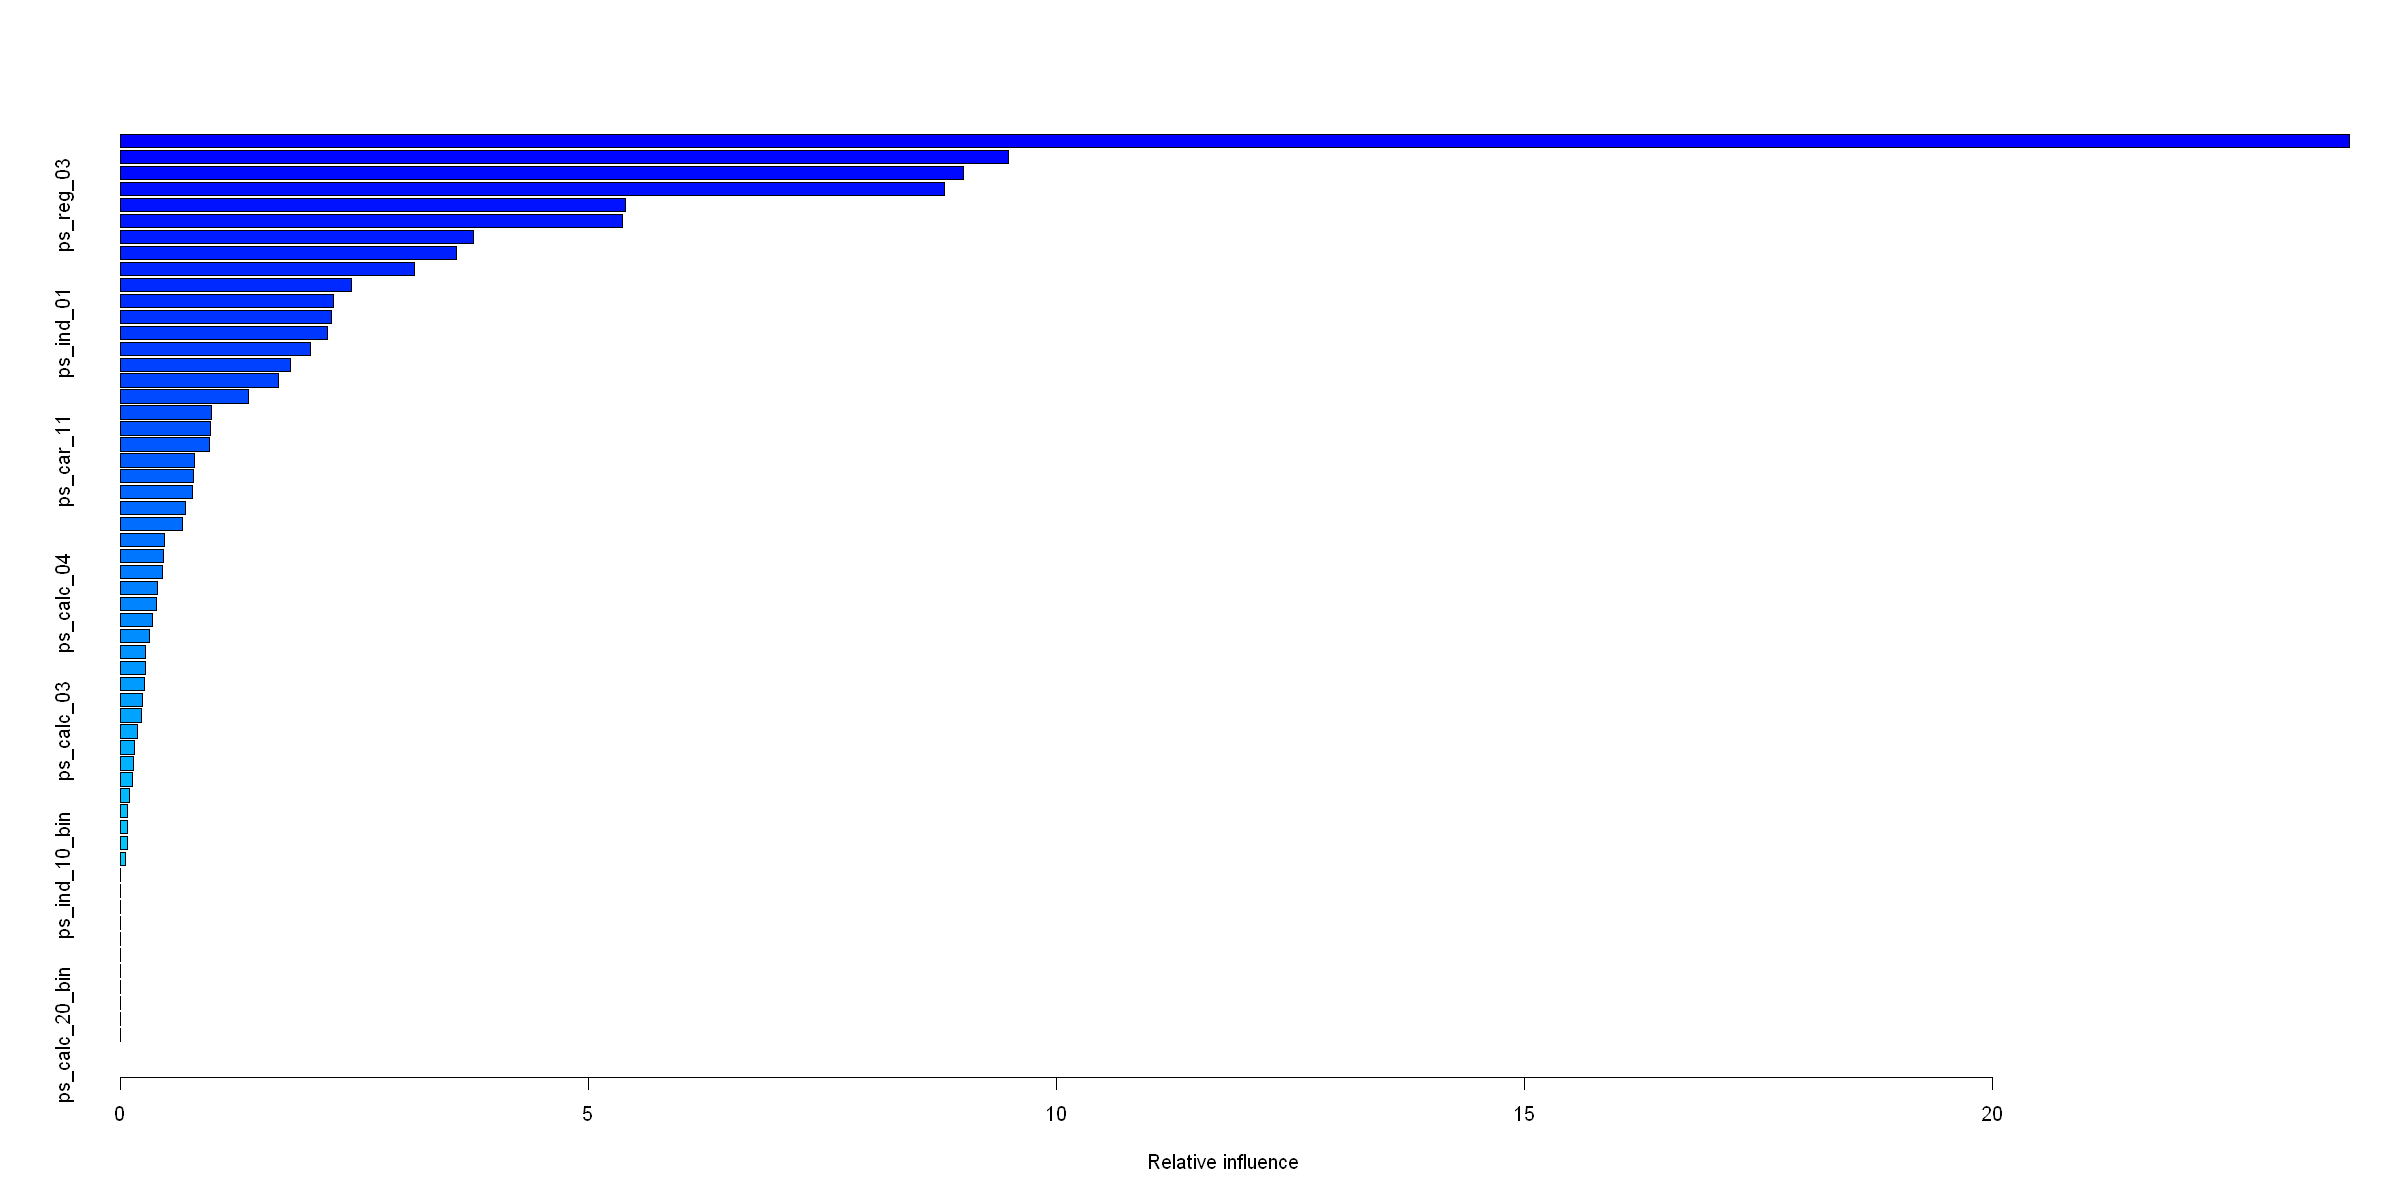

In [31]:
summary(gbmfit)

# Parameter tunning for gbm

In [32]:
ctrl1 = trainControl(method = 'cv',      
                    number = 5,  
                    summaryFunction = twoClassSummary, 
                    classProbs = TRUE)

In [33]:
gbmgrid = expand.grid(interaction.depth = c(3,4,5),  # number of splits on a tree
                      n.trees = (2:5)*100,           # number of trees to be formed
                      shrinkage = 0.2,               # learning rate of the model
                      n.minobsinnode = 5)            # number of observations allowed in the trees terminal nodes

In [34]:
set.seed(300)

gbmfit1 = train(target~ .,
                data = train,
                method = 'gbm',
                metric = 'ROC',
                tuneGrid = gbmgrid,
                trControl = ctrl1,
                verbose = F)

gbmfit1

Stochastic Gradient Boosting 

476169 samples
    57 predictor
     2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 380936, 380935, 380936, 380934, 380935 
Resampling results across tuning parameters:

  interaction.depth  n.trees  ROC        Sens       Spec        
  3                  200      0.6348473  0.9999019  0.0004034416
  3                  300      0.6340839  0.9998583  0.0005187154
  3                  400      0.6323355  0.9997777  0.0005763523
  3                  500      0.6307575  0.9997276  0.0006916094
  4                  200      0.6349657  0.9997276  0.0010950510
  4                  300      0.6328966  0.9996447  0.0017866937
  4                  400      0.6310202  0.9995423  0.0020172080
  4                  500      0.6294359  0.9993658  0.0021324652
  5                  200      0.6321834  0.9995488  0.0010950178
  5                  300      0.6306058  0.9993265  0.0017289904
  5                  400  

In [35]:
pred_gbmfit1 = predict(gbmfit1, test, type = 'raw') # doing prediction using gbmfit1.

In [36]:
pred_gbmfit1 = ifelse(pred_gbmfit1 == 'X0',0,1)

In [37]:
xtabs(~pred_gbmfit1 + target, test)   # confusion matrice

# gbmfit1 is 96.32% accurate on test.

            target
pred_gbmfit1      0      1
           0 114670   4340
           1     30      3

# ROC and AUC curve for gbm

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = pred_gbmfit1, predictor = test$target,     plot = T)

Data: test$target in 119010 controls (pred_gbmfit1 0) < 33 cases (pred_gbmfit1 1).
Area under the curve: 0.5272

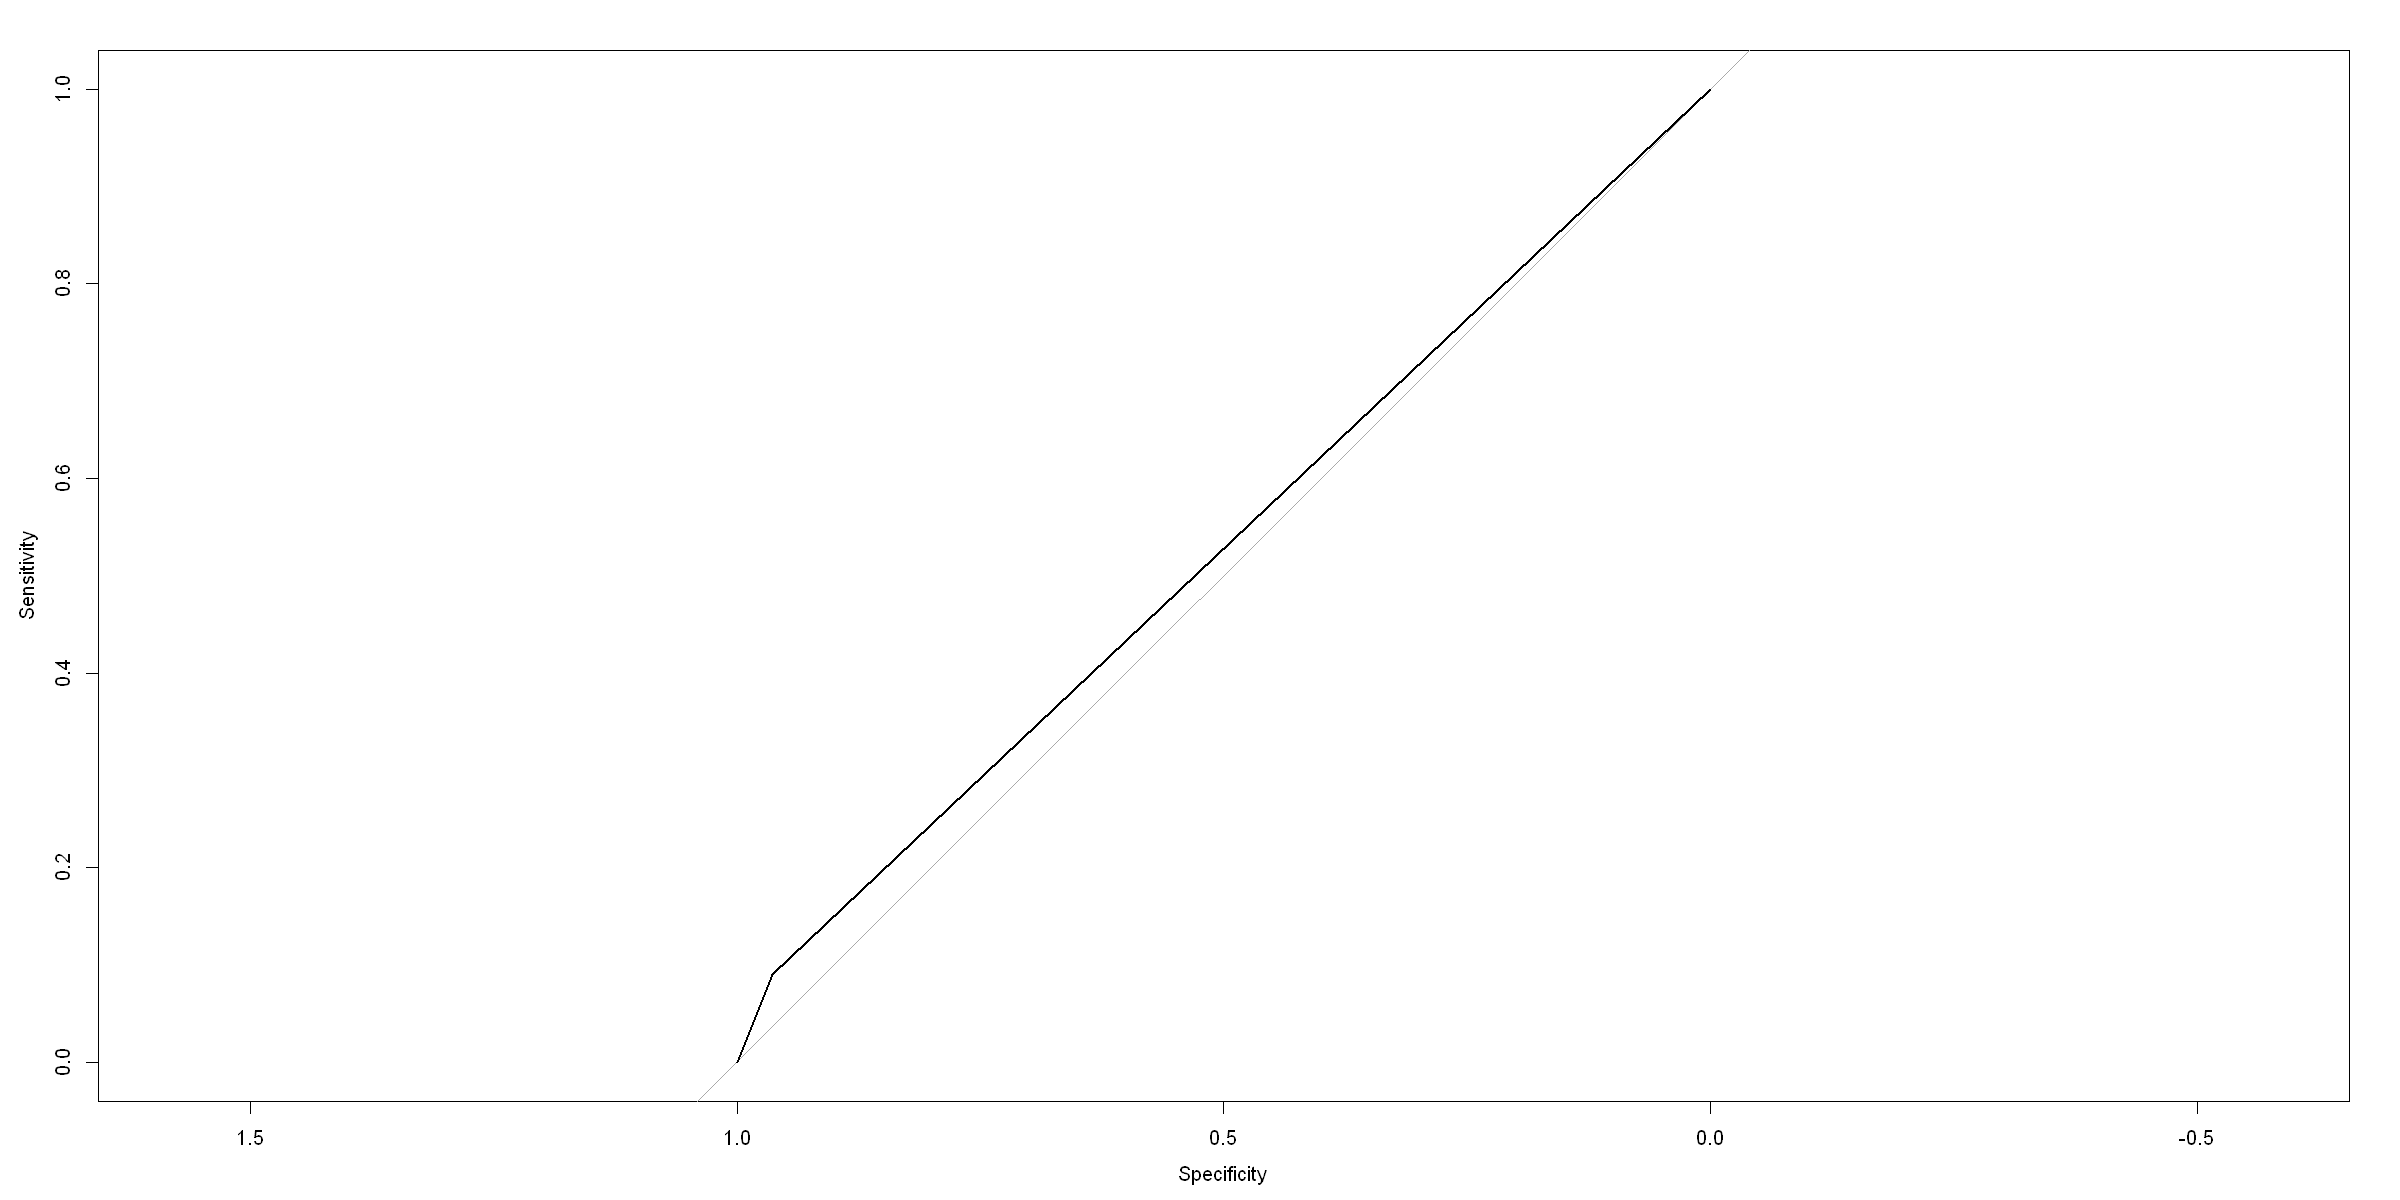

In [38]:
roc(pred_gbmfit1, test$target, plot = T) # ROC curve 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5272

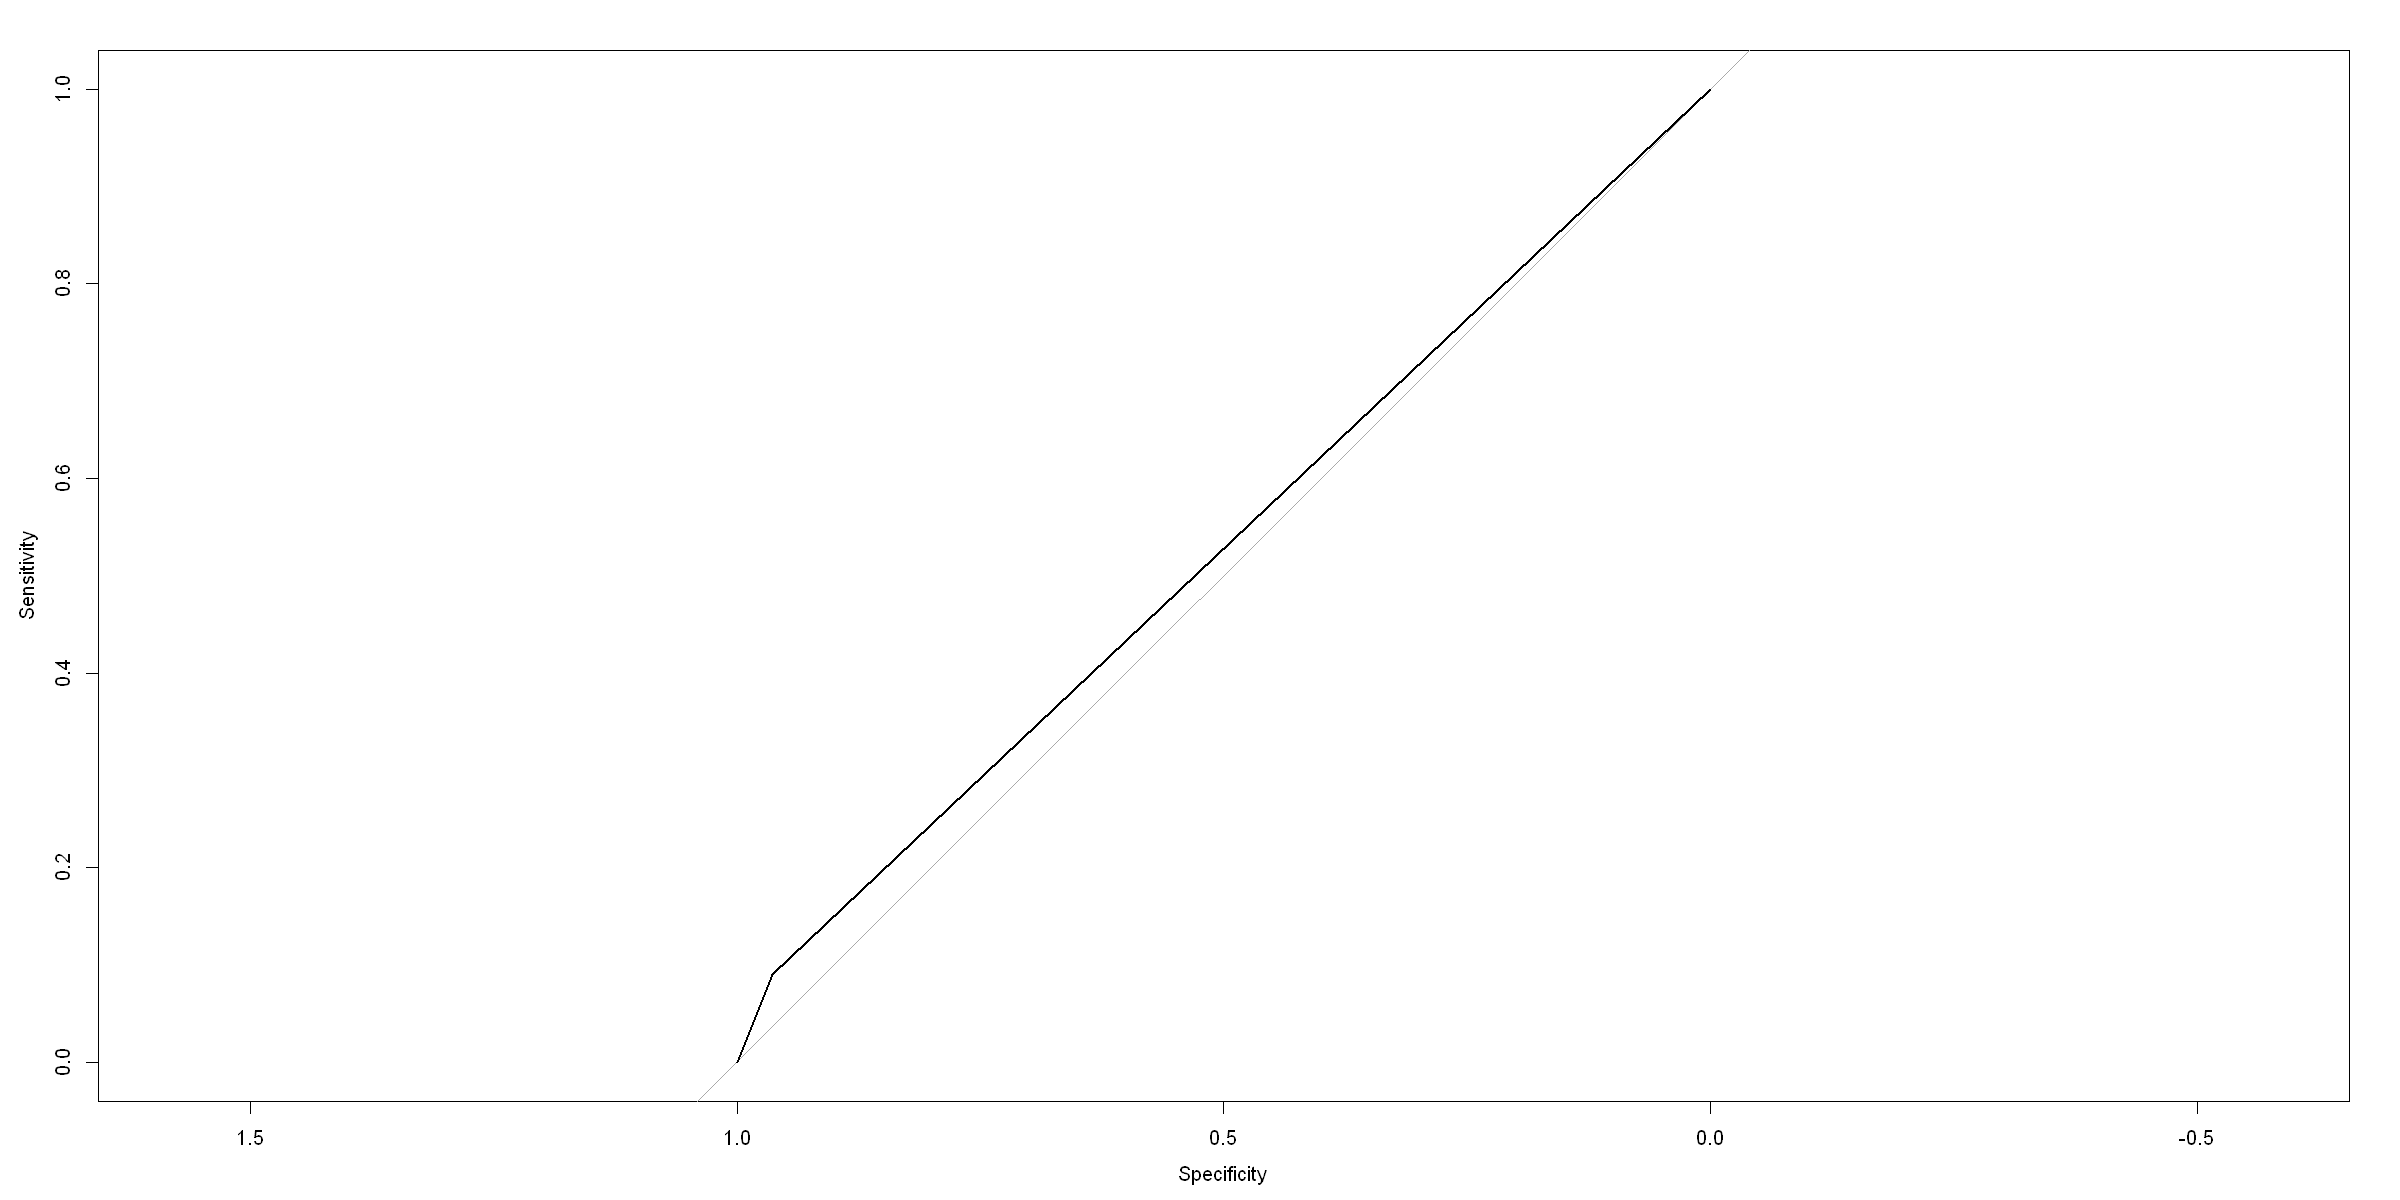

In [39]:
auc(pred_gbmfit1, test$target, plot = T) # AUC curve

# Prediction Using Xgboost

In [40]:
param = list(objective = 'binary:logistic',         # decides final output type (regression or classification)
             eval_metric = 'auc',                   # Evaluation metrics for validation
             max_depth = 5,                         # Maximum depth of a tree (default=6)
             eta = 0.3,                             # learning rate of the algorithm (default 0.3)
             gamma = 0.1,                           # Minimum loss reduction required on partition on a leaf node
             colsample_bytree =0.8,                 # fraction of columns to be randomly sampled for each tree.
             min_child_weight = 1)

In [41]:
a = train$target            
train$target = NULL

In [44]:
a = ifelse(a=='X0',0,1)

In [45]:
mod_xgb = xgboost(params = param,                # reference to parameters list
                  data = data.matrix(train),     # dataset to work on. Xgboost need data in matric form.
                  label = a,                     # dependent variable
                  nrounds = 1000,                # number of iterations
                  print_every_n = 50,            # Print every next nth iteratino progress messages
                  verbose = 1)                   # print information of performance or not

[1]	train-auc:0.606998 
[51]	train-auc:0.690905 
[101]	train-auc:0.726412 
[151]	train-auc:0.754140 
[201]	train-auc:0.776387 
[251]	train-auc:0.796353 
[301]	train-auc:0.813794 
[351]	train-auc:0.827317 
[401]	train-auc:0.845554 
[451]	train-auc:0.857442 
[501]	train-auc:0.870273 
[551]	train-auc:0.880112 
[601]	train-auc:0.887891 
[651]	train-auc:0.898384 
[701]	train-auc:0.906350 
[751]	train-auc:0.913082 
[801]	train-auc:0.918148 
[851]	train-auc:0.924649 
[901]	train-auc:0.929609 
[951]	train-auc:0.935357 
[1000]	train-auc:0.939377 


In [46]:
b = test$target
test$target = NULL

In [47]:
pred_xgb = predict(mod_xgb, data.matrix(test), type = 'response') # doing prediction

In [48]:
pred_xgb = ifelse(pred_xgb<0.5,0,1)

In [49]:
xtabs(~pred_xgb + b)

# mod_xgb is 96.31% accurate on test.

        b
pred_xgb      0      1
       0 114649   4339
       1     51      4

# Feature importance for Xgboost

In [50]:
xgb.importance(model = mod_xgb)

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
ps_car_13,0.12715423624,0.2429379173,0.1271831961
ps_reg_03,0.09796768823,0.2013093346,0.1122182042
ps_car_14,0.05448787688,0.0787090537,0.0611679618
ps_ind_03,0.03397396351,0.0214799538,0.0294298684
ps_car_11_cat,0.03223632292,0.0269658050,0.0325075017
ps_ind_15,0.03206264319,0.0182530900,0.0315072709
ps_calc_10,0.03094477671,0.0254251722,0.0332384396
ps_calc_14,0.03035079846,0.0234499175,0.0324305609
ps_calc_01,0.02797919277,0.0110037999,0.0275448180


# ROC and AUC curve for Xgboost

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = pred_xgb, predictor = b, plot = T)

Data: b in 118988 controls (pred_xgb 0) < 55 cases (pred_xgb 1).
Area under the curve: 0.5181

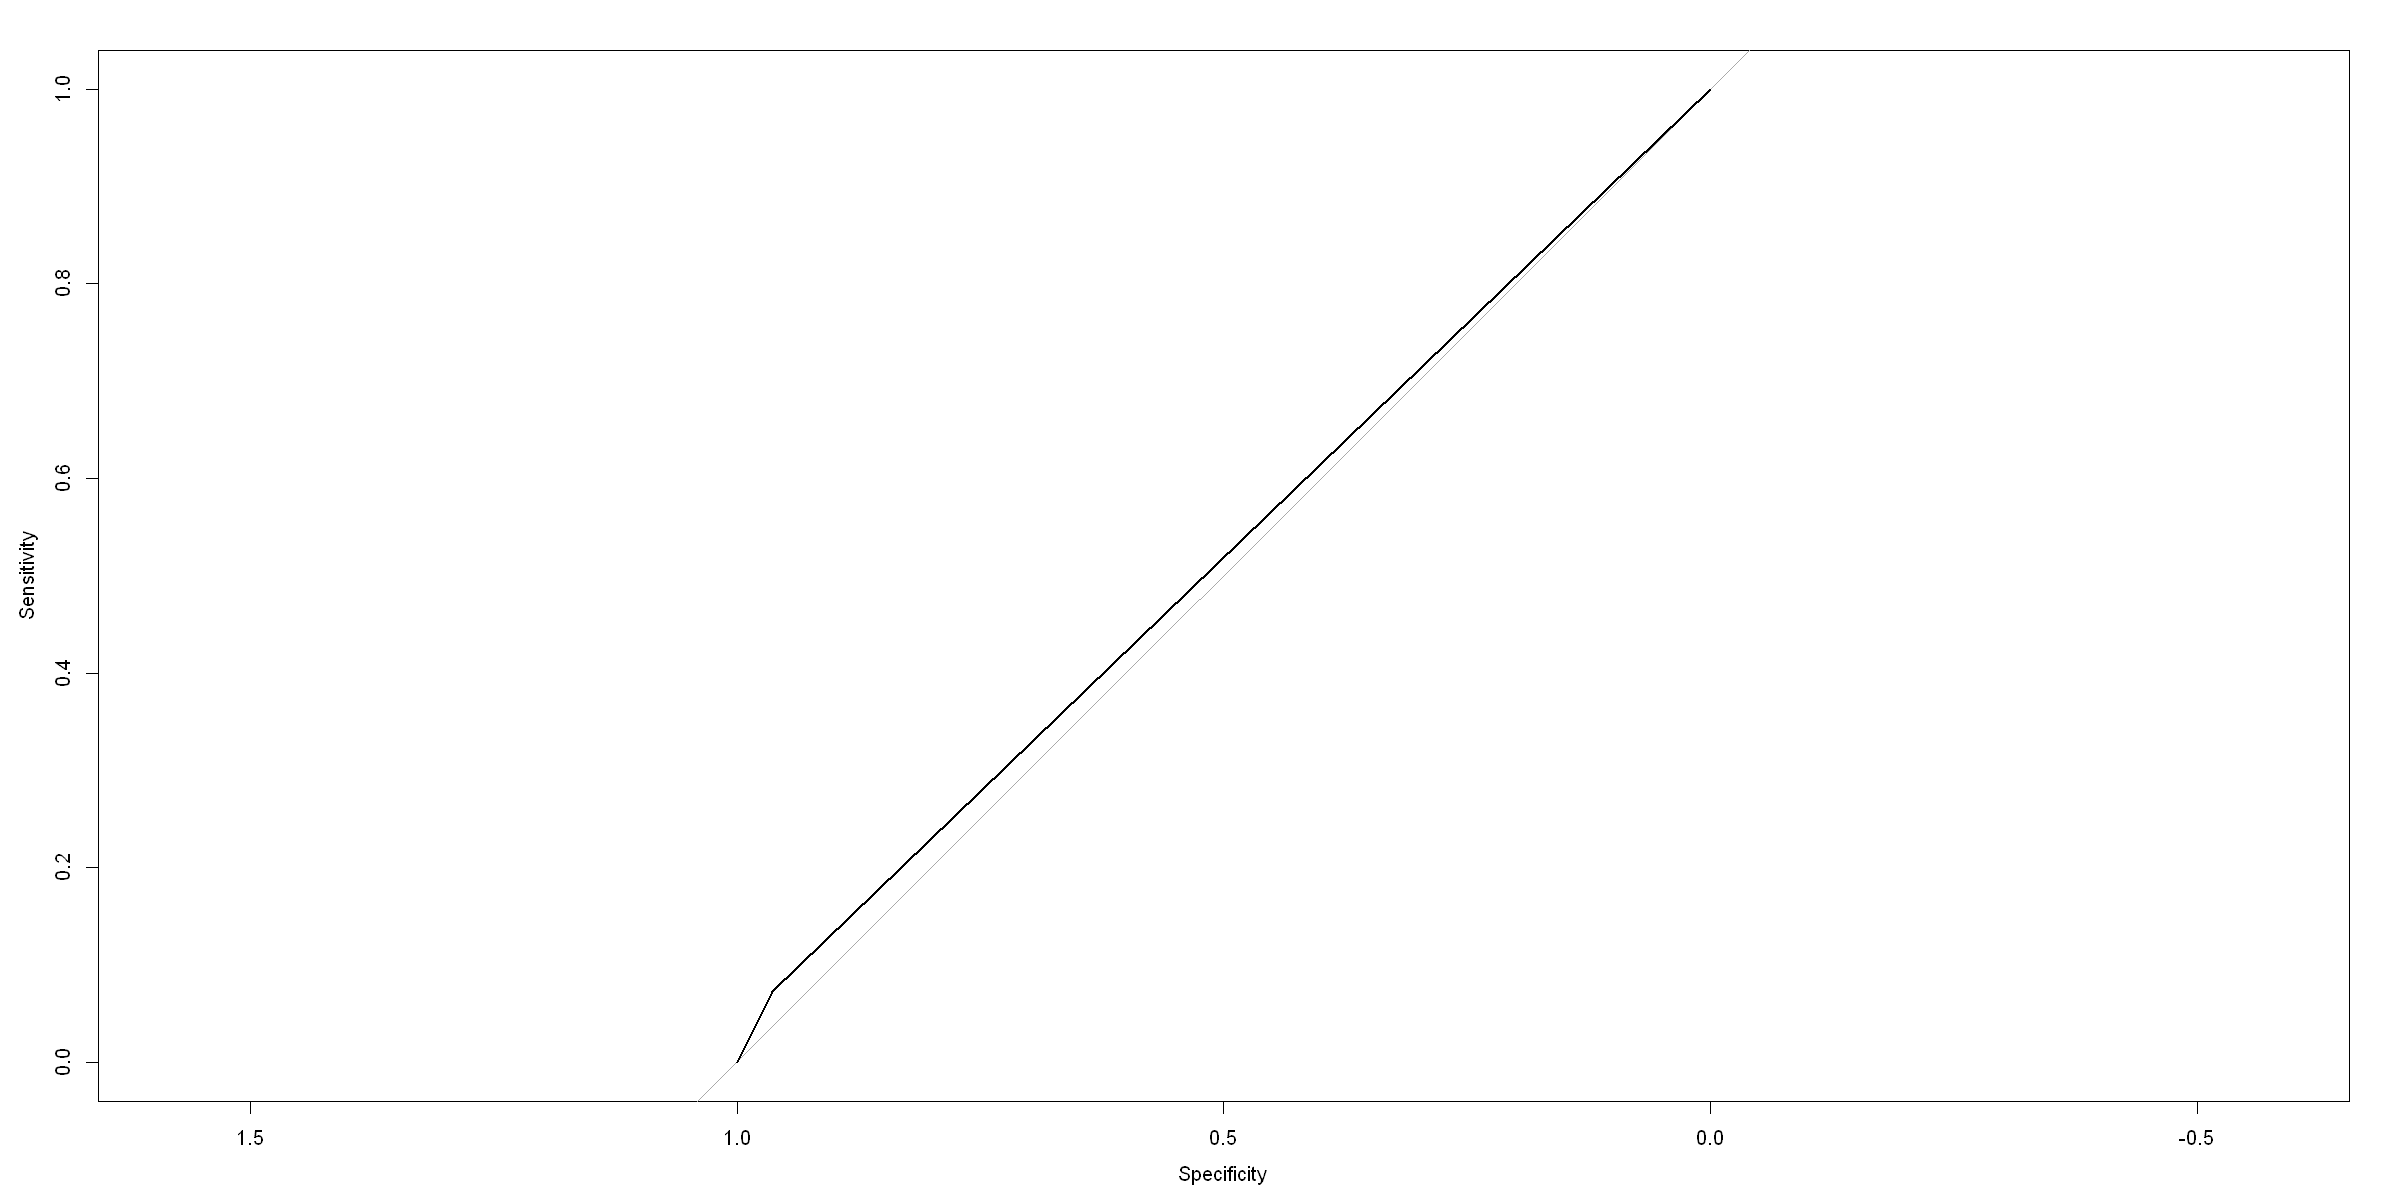

In [51]:
roc(pred_xgb, b, plot = T) # ROC curve

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5181

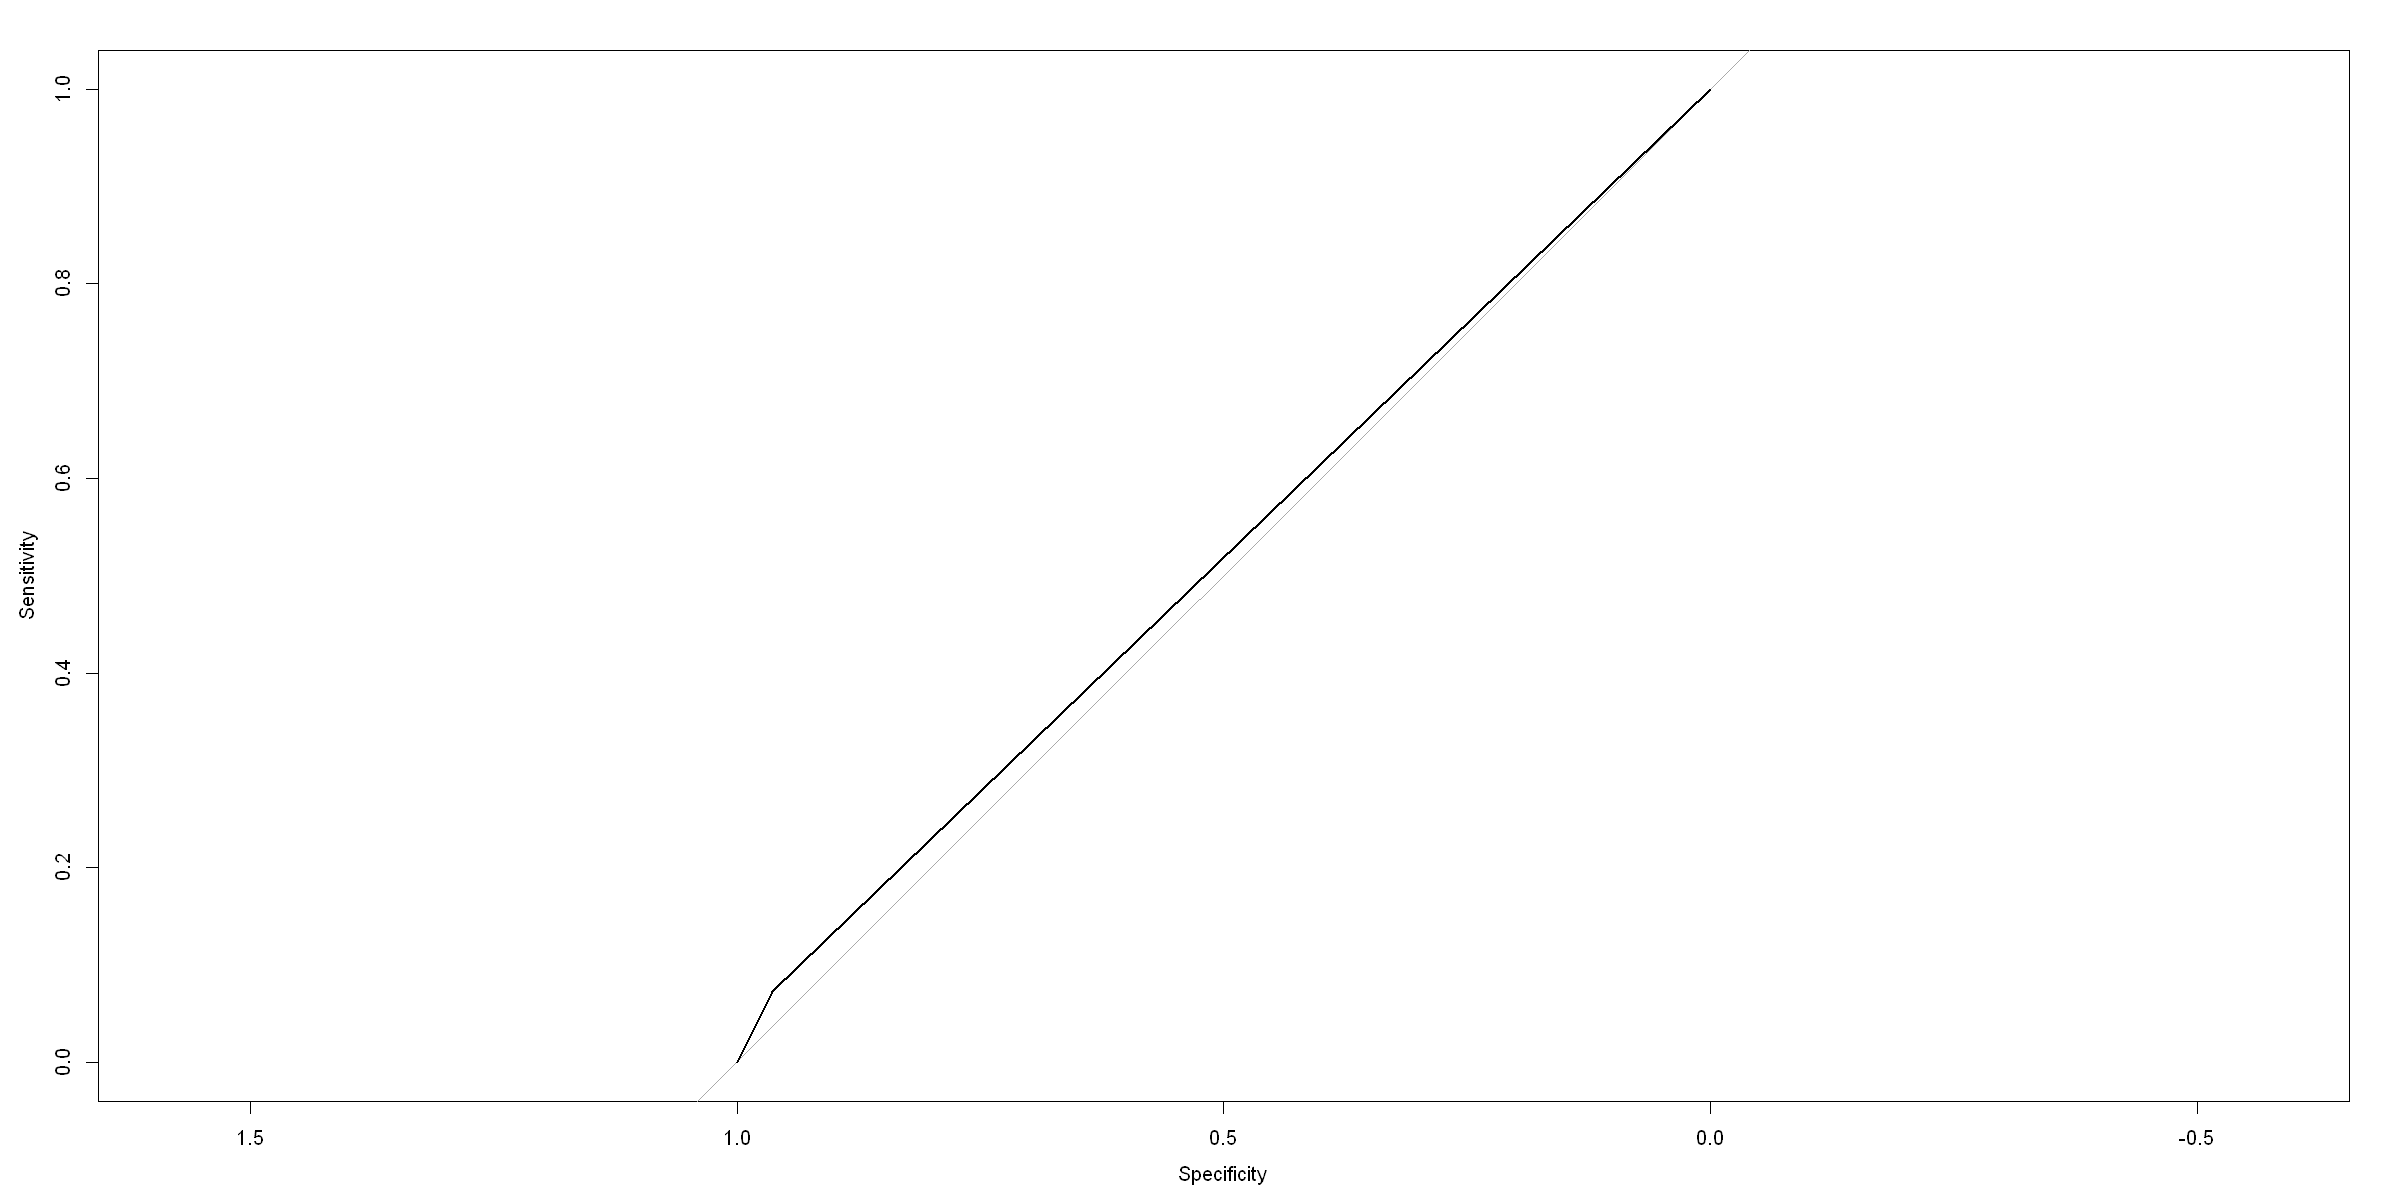

In [52]:
auc(pred_xgb, b, plot = T) # AUC curve

# Conclusion

Three lgorithm used are:- 

 * Logistic Regression
 * GBM
 * Xgboost
 
GBM model after Parameter Tunning for arguement interaction.dept and n.trees is fitting best with AUC 0.5272 while Xgboost without parameter tunning have AUC 0.5181.